In [2]:
import os 

# The normal imports
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', -1)

# Import the stats library
from scipy import stats

# These are the plottinglibraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
plt.style.use("classic")
import seaborn as sns

#Machine learning


# Command for plots to appear in the iPython Notebook
%matplotlib inline
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#Starting with the dataset that Dr.Drew helped clean.->highschools saved to .cvs file from graduations rates (2) notebook
wd = os.getcwd() #get working directory
highschools = pd.read_csv(wd+'\\data\\highschools.csv', low_memory=False)
highschools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Columns: 294 entries, Unnamed: 0 to Percent GLP
dtypes: bool(8), float64(264), int64(9), object(13)
memory usage: 1.0+ MB


#### Business Understanding [10]

Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? 
How would you measure the effectiveness of a good prediction algorithm? Be specific.

#### Data Meaning Type  [10]

Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.

#### Data Quality [15]

Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.

In [4]:
#Get dimensions of the dataframe that we working with
highschools.shape

(478, 294)

In [5]:
#Make a copy of the dataset to work with
HighschoolData = highschools.copy()

##### *Missing Data Statistics*

In this section we explore missing data in the highschool data that was created from the original north carolina data. After exploring the missing data we will discusss the approach for handling them.

In [6]:
#Check for missing values
Temp = pd.DataFrame(HighschoolData.isnull().sum())
#print(Temp)
Temp.columns =['DataMissing']
#Columns with atleast 1 missing value
MissingCount = Temp[Temp.DataMissing>0]

#sort 
MissingCount = MissingCount.sort_values('DataMissing',ascending=False)
#basic starts on missing data
print("##################################################")
print("###", '             Stats on missing data        ',  "###")
print("##################################################")
print('No of rows in HighschoolData: ',len(HighschoolData))
print('No of Columns in HighschoolData: ',len(HighschoolData.columns))
print('No. of Columns with Missing data: ',len(MissingCount))
print('No  of Complete data columns: ', len(HighschoolData.columns) - len(MissingCount))
print('No. of Columns with 100% missing Values: ',sum(1 for item in MissingCount.DataMissing if item==len(HighschoolData)))
print('No. of Columns more than 95% missing Values: ',sum(1 for item in MissingCount.DataMissing if item>=0.95*len(HighschoolData)))
print('% of Columns with some Missing data: ',round(float(100*len(MissingCount))/len(HighschoolData.columns),3),'%')
print('% of Columns with 100% Missing data: ',round(float(100*sum(1 for item in MissingCount.DataMissing if item==len(HighschoolData)))/len(HighschoolData.columns),3),'%')
print('% of Columns with more than 95% Missing data: ',round(float(100*sum(1 for item in MissingCount.DataMissing if item>=0.95*len(HighschoolData)))/len(HighschoolData.columns),3),'%')

print(" ")
print("##################################################")
print("###",'       Columns with >95% missing data     ',    "###")
print("##################################################")
#add a columnName for Bar charts plot
MissingCount['ColumnName'] = MissingCount.index
MissingCount['Missing %'] = 100*(MissingCount.DataMissing/len(HighschoolData))
MissingCount = MissingCount.reset_index()
del MissingCount['index']
print((MissingCount.head(100)))

##################################################
###              Stats on missing data         ###
##################################################
No of rows in HighschoolData:  478
No of Columns in HighschoolData:  294
No. of Columns with Missing data:  168
No  of Complete data columns:  126
No. of Columns with 100% missing Values:  47
No. of Columns more than 95% missing Values:  99
% of Columns with some Missing data:  57.143 %
% of Columns with 100% Missing data:  15.986 %
% of Columns with more than 95% Missing data:  33.673 %
 
##################################################
###        Columns with >95% missing data      ###
##################################################
    DataMissing                ColumnName   Missing %
0   478          Percent GLP               100.000000
1   478          total_expense_num         100.000000
2   478          GCE_RPF_State_Pct         100.000000
3   478          GCE_PRM_State_Pct         100.000000
4   478          GCE_LEP_State_

From above we note, of the 293 columns in HighSchoolData, 168 (57.14%) of them have some missing data. 47 (15.99%) of columns have all the data missing where 99 (33.67%) of the columns miss more than 95% of the data. For columns with 100% missing data we are left but to wonder if this were new fields introduced recently and the schools are not fully informed to collect this data or the data for not just collected by mistake. On the other hand, for the partally completed datasets, some schools migh have left this columns blank if they didn't apply to the.

For the sake of this analysis we will drop the columns that have `>95` missing data rather than try complete the missing data with either mean, median or mode. If we complete this large amount of columns, with predetermined data, our model maybe baised and throw us off.

In [7]:
#All columns from Original schoolData
AllColumns =HighschoolData.columns 

# All columns with some missing value
ColumnsWithMissingdata = MissingCount.ColumnName 

#columns with more than 95% missing data
Columns2Drop = MissingCount.ColumnName.head(99) 

#columns with missing values that are kept
Columns2Keep = MissingCount.ColumnName.tail(len(MissingCount)-99) 

#All the other columns except those with >95% missing data
SelectedColumns = list(set(AllColumns)-set(Columns2Drop)) 

#new dataset, columns with >95% missing data dropped

schoolDataNew = HighschoolData[SelectedColumns]

print("##################################################")
print("###", '          Orginal Highschooldata info     ',  "###")
print("##################################################")
print(HighschoolData.info())
print("##################################################")
print("###", '  Columns with >95 data missing   dropped ',  "###")
print("##################################################")
print(schoolDataNew.info())
schoolDataNew.head(5)

##################################################
###           Orginal Highschooldata info      ###
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Columns: 294 entries, Unnamed: 0 to Percent GLP
dtypes: bool(8), float64(264), int64(9), object(13)
memory usage: 1.0+ MB
None
##################################################
###   Columns with >95 data missing   dropped  ###
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Columns: 195 entries, lea_state_perpupil_num to lea_tchyrs_4thru10_pct
dtypes: bool(8), float64(167), int64(9), object(11)
memory usage: 702.1+ KB
None


,lea_state_perpupil_num,Avg_Class_Size_EnglishII,lea_tchyrs_11plus_pct,st_prinyrs_0thru3_pct,summer_program_flg,SPG Grade,stud_internet_comp_num,Tch_Exp_Pct_0_3_Years,Dist_Prin_Exp_Pct_0_3_Years,ap_ib_courses,...,Avg_Dist_Size_MathI,short_susp_per_c_num,st_advance_dgr_pct,univ_college_courses,st_prinyrs_4thru10_pct,Dist_Tch_Exp_Pct_4_10_Years,lea_supplies_expense_pct,Dist_Tch_Exp_Pct_0_3_Years,wap_per_classroom,lea_tchyrs_4thru10_pct
0,5529.5,13.0,0.518,0.43,False,NaN,0.69,0.000,0.417,NaN,...,21.0,0.00,0.248,NaN,0.427,0.24,0.074,0.242,NaN,0.24
1,5529.5,22.0,0.518,0.43,False,NaN,1.36,0.186,0.417,NaN,...,21.0,12.49,0.248,NaN,0.427,0.24,0.074,0.242,1.05,0.24
2,5529.5,18.0,0.518,0.43,False,NaN,0.91,0.463,0.417,NaN,...,21.0,12.05,0.248,NaN,0.427,0.24,0.074,0.242,1.25,0.24
3,5529.5,17.0,0.518,0.43,False,NaN,1.01,0.318,0.417,NaN,...,21.0,22.25,0.248,NaN,0.427,0.24,0.074,0.242,1.27,0.24
4,5529.5,23.0,0.518,0.43,False,NaN,1.36,0.235,0.417,NaN,...,21.0,10.08,0.248,NaN,0.427,0.24,0.074,0.242,0.99,0.24


In the code block above, we drop 99 columns which have >95% of the data missing.

In [8]:
#Exploring the columns with missing dataset that are retained
df = schoolDataNew[Columns2Keep]
temp_df = df.copy() 
print("##################################################")
temp  = df.select_dtypes(include=['int','float'])
temp2  = df.select_dtypes(include=['object', 'bool'])
print("#      Columns with continious data (int, float) #")
print("##################################################")
temp.info()
print(" ")
print("##########################################")
print("#     Columns with Contegorical data      #")
print("##########################################")
temp2.info()
print(" ")
print("Total # of columns: ",len(Columns2Keep))

##################################################
#      Columns with continious data (int, float) #
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 64 columns):
ib_pct_4_or_above                                 24 non-null float64
emer_prov_teach_pct                               61 non-null float64
lea_ib_pct_4_or_above                             185 non-null float64
lea_emer_prov_teach_pct                           229 non-null float64
ap_participation_pct                              324 non-null float64
AP_Courses_Offered                                338 non-null float64
ACT WorkKeys Score                                359 non-null float64
ap_pct_3_or_above                                 365 non-null float64
ap_ib_courses                                     368 non-null float64
univ_college_courses                              374 non-null float64
lea_books_per_student             

In the code block above we explore the columns with missing data that we retained. we group the columns into two based on data type as we will have two different approaches for replacing the missing data;
1. #### Columns with continuous data types (ints and floats)
Of the 69 columns retained with missing data, 64 are of dtype float64. After reviewing individual columns description from the data dictionary, We choose to replacing this missing float types with median. We didn't go with mean simply because with existance of outliers, mean would be screwed compared to median.
2. #### Columns with contegorical data types (objects)
For the 5 categorical values we will replacing the missing values with mode.

In [9]:
#this function replaces NA's for columns with continous 'Con' (int or float) variables with median and categorical 'Cat' variable(bool or object) with mode
def ReplaceMissingdata(df = schoolDataNew):
    temp_df = df.copy() 
    print("#######################################")
    print("## continous and categorical columns ##")
    print("#######################################")
    temp  = df.select_dtypes(include=['int64','float'])    #continuous values columns
    columnnames = temp.columns
    temp1  = df.select_dtypes(include=['object','bool']) #catagorical values columns
    columnnames1 = temp1.columns
    print(" ")
    
    print("##############################")
    print("## NA count Before Cleaning ##")
    print("##############################")
    print(df.isnull().sum())
    #replacing missing continous values with median
    for i in range(0,len(columnnames)):
        try:
            temp_array =temp[temp[columnnames[i]]!=np.nan][columnnames[i]] #temp array of non NAs for continous values to calculate median
            # replace NAs with median for continous variables created from above arrays
            temp_df[columnnames[i]] =temp_df[columnnames[i]].replace(np.nan,temp_array.median())     
        except Exception as e:
            print(e.args) 
            
    #replacing missing contegorical values with mode
    for i in range(0,len(columnnames1)):
        try:
            temp_array1 =temp1[temp1[columnnames1[i]]!=np.nan][columnnames1[i]] #temp array of non NAs for categorical values to calculate mode
            # replace NAs with median for categorical values created from above arrays with mode
            temp_df[columnnames1[i]] =temp_df[columnnames1[i]].replace(np.nan,str(temp_array1.mode()))      
        except Exception as e:
            print(e.args)

    print("##############################")
    print("## NA Count After Cleaning  ##")
    print("##############################")
    print(temp_df.isnull().sum())
    df = temp_df
    return df

new_schooldata = ReplaceMissingdata(schoolDataNew)    

new_schooldata.info()

#######################################
## continous and categorical columns ##
#######################################
 
##############################
## NA count Before Cleaning ##
##############################
lea_state_perpupil_num          0  
Avg_Class_Size_EnglishII        12 
lea_tchyrs_11plus_pct           0  
st_prinyrs_0thru3_pct           0  
summer_program_flg              0  
SPG Grade                       28 
stud_internet_comp_num          9  
Tch_Exp_Pct_0_3_Years           0  
Dist_Prin_Exp_Pct_0_3_Years     0  
ap_ib_courses                   110
Math I Score                    37 
st_univ_college_courses         27 
school_type_txt                 0  
st_flicensed_teach_pct          0  
lea_univ_college_courses        35 
lea_stud_internet_comp_num      0  
lea_emer_prov_teach_pct         249
st_total_specialized_courses    27 
Tch_Exp_Pct_4_10_Years          0  
lea_avg_age_media_collection    91 
long_susp_per_c_num             0  
Avg_Class_Size_Biology       

In the code block above, we replaced missing catagorical values with mode and missing continous values with median. A total of 69 columns with missing values have been cleaned.

In [10]:
# function for getting column description from the data dictionary. 
# It is at the bottom of the notebook in the exceptional work section. Run it first before calling it in this cell
get_ColDescription()

Enter column name to check description in Dictionary. You can enter multiple columns separated by comma: 
You entered:  


,COLUMN_NAME,DESCRIPTION


#### Simple Statistics [10]
Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful. 

#### Visualize Attributes [15]
Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate.

category_cd
A    4  
H    459
T    15 
dtype: int64

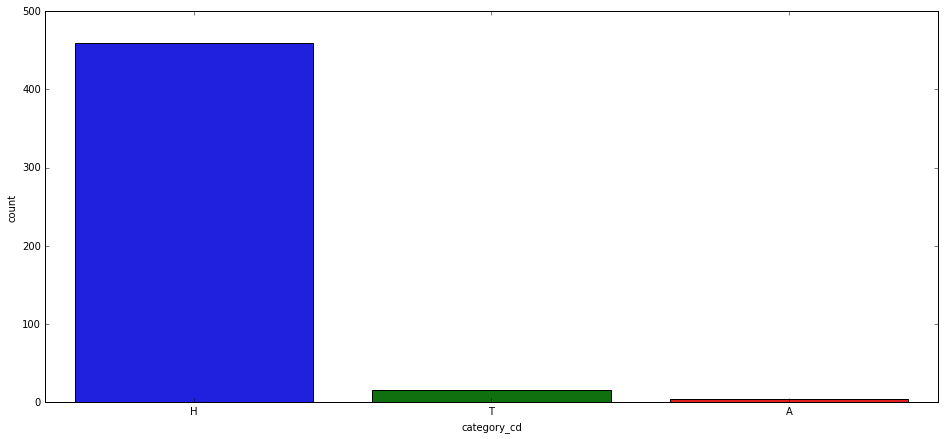

In [31]:
# School Category Factor plot 
fig, ax = plt.subplots(figsize=(16, 7))
sns.countplot("category_cd",data=new_schooldata)
new_schooldata.groupby(["category_cd"]).size()

Of the 478 High schools, 459 are of fall in  category H ,15 of catagory T and 4 of category A. Please reference the table below for school category descriptions

In [12]:
get_ColDescription()


Enter column name to check description in Dictionary. You can enter multiple columns separated by comma: A,H,T
You entered:  A,H,T


,COLUMN_NAME,DESCRIPTION
373,a,"School has elementary, middle, and high school grades"
370,h,School has high schools grades (9-13)
372,t,School has middle and high school grades


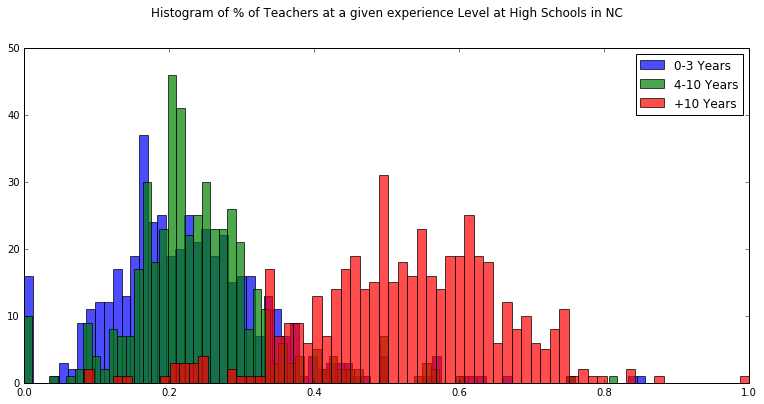

In [13]:
#histograms of teacher experience
#with sns.axes_style("darkgrid"):
X =new_schooldata.Tch_Exp_Pct_0_3_Years
Y  =new_schooldata.Tch_Exp_Pct_4_10_Years
Z =new_schooldata["Tch_Exp_Pct_10+_Years"]
fig, ax = plt.subplots(figsize=(13, 6))
bins = 70
figure_title = "Histogram of % of Teachers at a given experience Level at High Schools in NC"
plt.title(figure_title, y=1.08)
plt.hist(X, bins, alpha=0.7, label='0-3 Years')
plt.hist(Y, bins, alpha=0.7, label='4-10 Years')
plt.hist(Z, bins, alpha=0.7, label='+10 Years')
plt.legend(loc='upper right')
plt.show()

#### TO be updated.
From Histogram above, majority of schools in NC have high percentage of teachers with over 10 years of experience. There is little difference in distributions of percentages of teachers with 0-3 years and 4 to 10 years. 

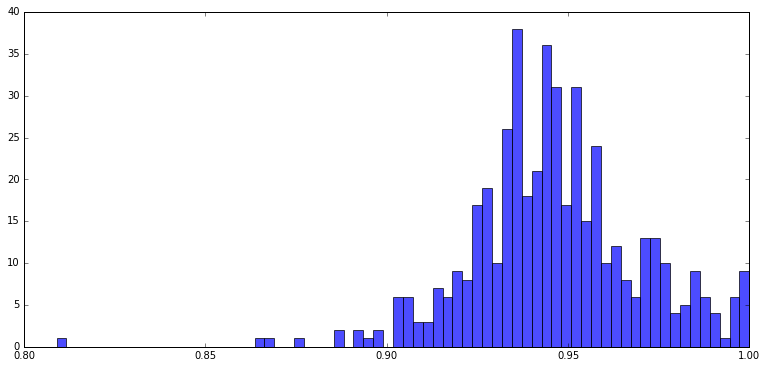

In [34]:
#
A =new_schooldata.avg_daily_attend_pct
fig, ax = plt.subplots(figsize=(13, 6))
bins = 70
plt.hist(A, bins, alpha=0.7)
plt.show()


In [ ]:
get_ColDescription()

#### Explore Joint Attributes [15]
Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.

### 1. School Performance Measures

In [14]:
#Categorical columns for joint plots explorations
temp = new_schooldata.select_dtypes(['bool','object'])

#store the selected columns list in array
categorical_cols = temp.columns
print('Categorical columns')
print('-------------------------------')
print(categorical_cols)

print('-------------------------------')
print('')
print('-------------------------------')
print('Educator Experience')
#list of columns for teacher experience measures
teacher = [col for col in new_schooldata.columns if 'Tch' in col]
Teacher = [teacher[1], teacher[2],teacher[6]]
print(Teacher)
print('-------------------------------')
print('')
print('-------------------------------')
#List of Columns for achivement score measures
#Achivement_measures  = ['The ACT Score','Overall Achievement Score','sch_percent_college_enrolled_16_mos_post_grad','EVAAS Growth Score','Math Course Rigor Score','sat_avg_score_num','Cohort Graduation Rate Standard Score']
Achievement_scores = [col for col in new_schooldata.columns if 'score' in col]
Achievement_Scores = [col for col in new_schooldata.columns if 'Score' in col]

#combine the above two arrays
Achievement_measures = Achievement_Scores+Achievement_scores 
print('Achievement Measures columns')
print('-------------------------------')
Achievement_measures

Categorical columns
-------------------------------
Index(['summer_program_flg', 'SPG Grade', 'school_type_txt', 'focus_clp_flg',
       'stem_flg', 'no_data_spg_flg', 'title1_type_flg', 'Byod', 'clp_ind_flg',
       'EVAAS Growth Status', 'unit_code', 'esea_status', 'calendar_only_txt',
       'State Gap Compared', '1_to_1_access', 'type_cd_txt', 'asm_no_spg_flg',
       'category_cd', 'Grad_project_status'],
      dtype='object')
-------------------------------

-------------------------------
Educator Experience
['Tch_Exp_Pct_4_10_Years', 'State_Tch_Exp_Pct_10+_Years', 'Dist_Tch_Exp_Pct_10+_Years']
-------------------------------

-------------------------------
Achievement Measures columns
-------------------------------


['Math I Score',
 'Overall Achievement Score',
 'ACT WorkKeys Score',
 'EVAAS Growth Score',
 'English II Score',
 'Biology Score',
 'Cohort Graduation Rate Standard Score',
 'Math Course Rigor Score',
 'SPG Score',
 'The ACT Score',
 'lea_sat_avg_score_num',
 'st_sat_avg_score_num',
 'nat_sat_avg_score_num',
 'sat_avg_score_num']

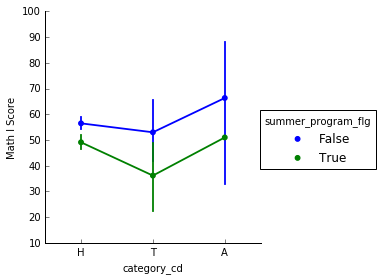

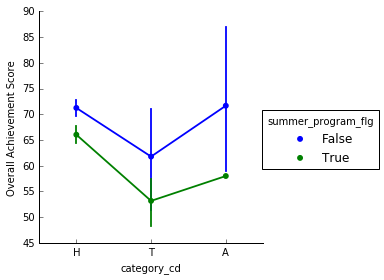

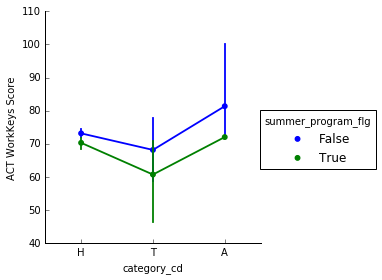

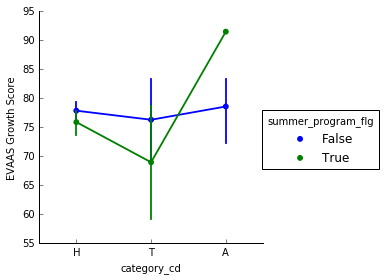

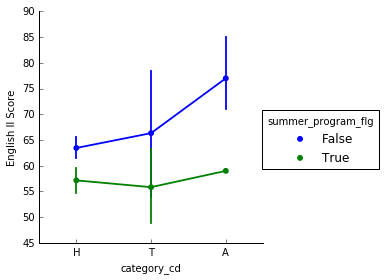

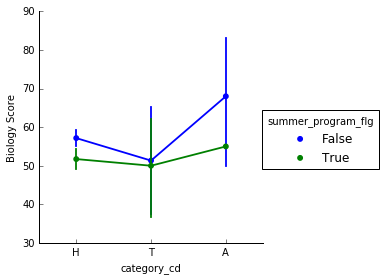

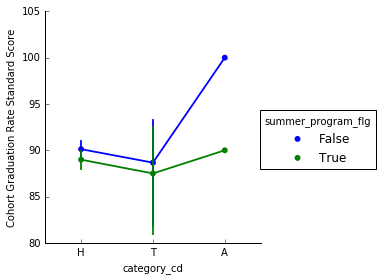

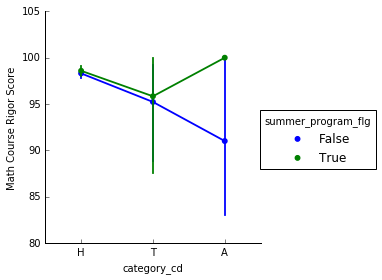

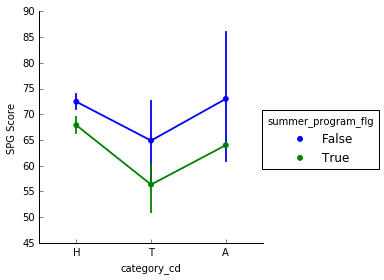

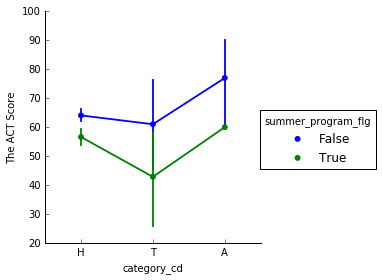

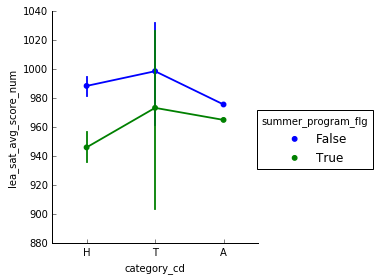

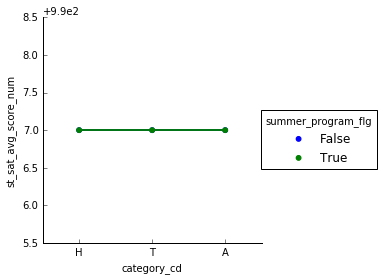

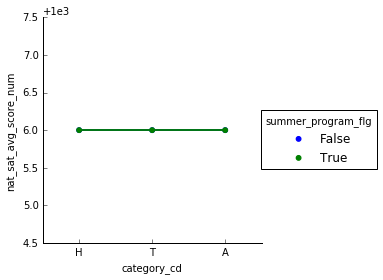

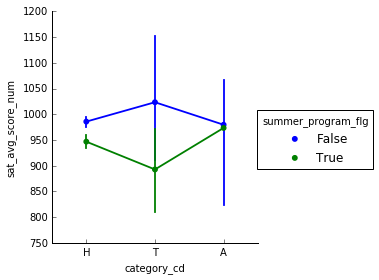

In [15]:
# factor plots for scores vs teacher experience considering categorical factors
for i in range(0, len(Achievement_measures)):
    sns.factorplot('category_cd',Achievement_measures[i],hue='summer_program_flg',data=new_schooldata)

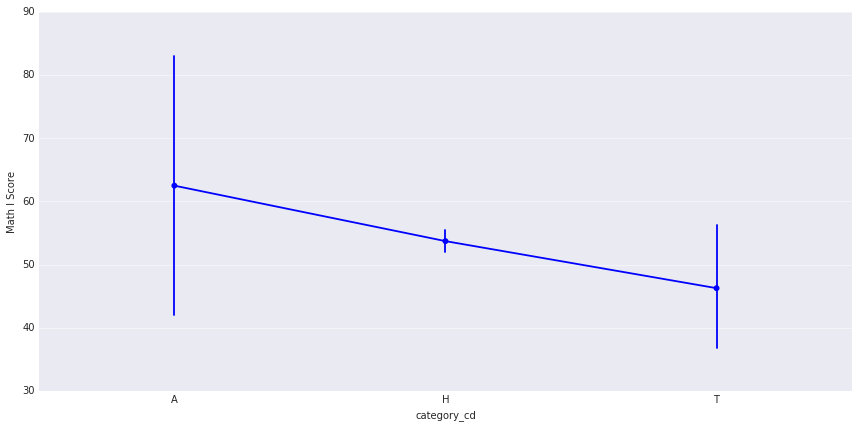

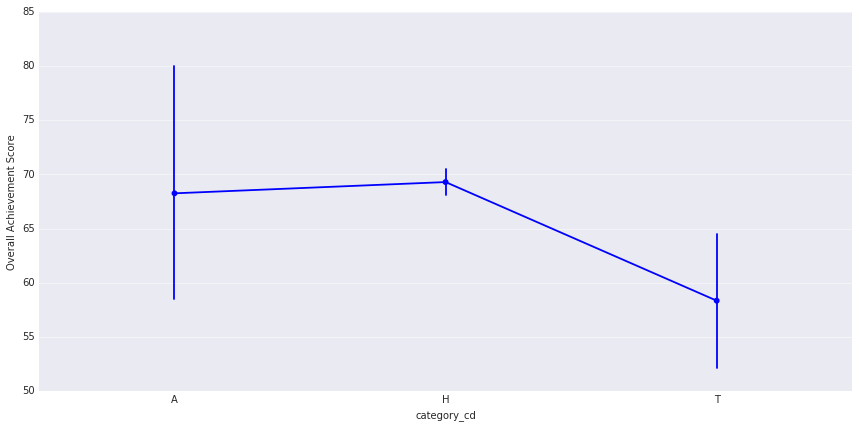

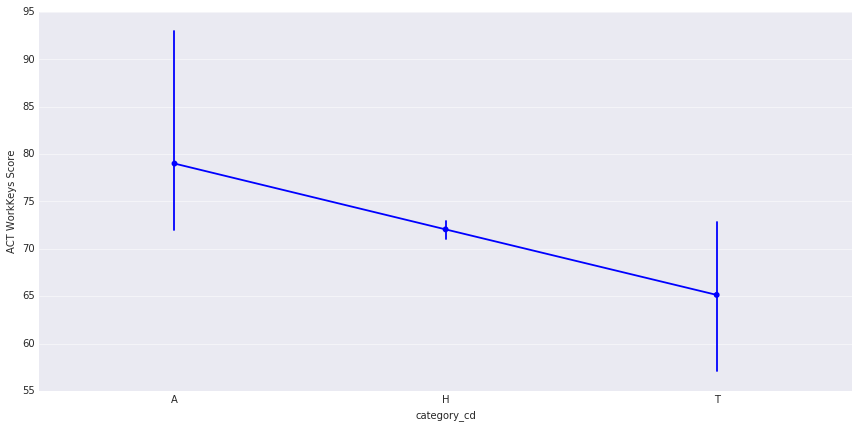

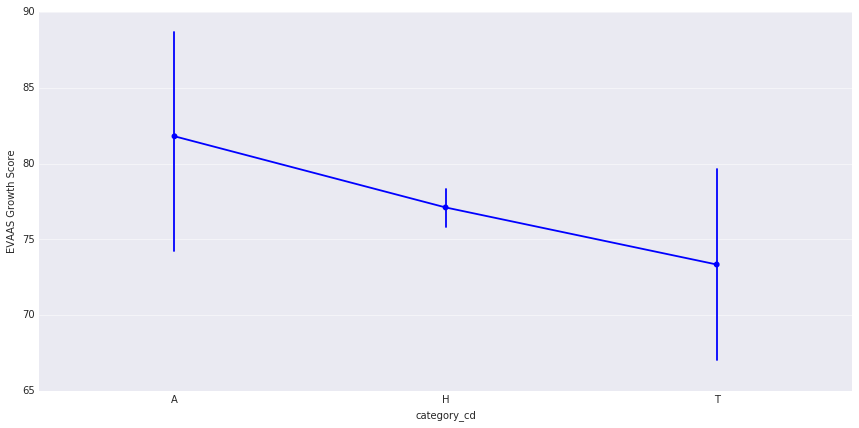

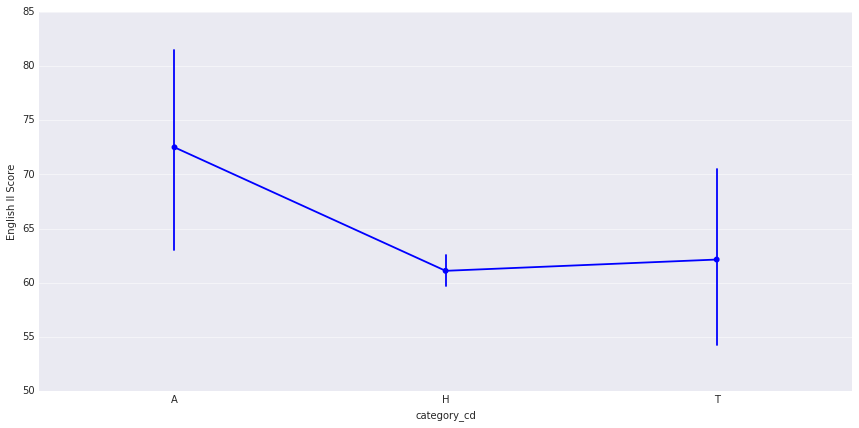

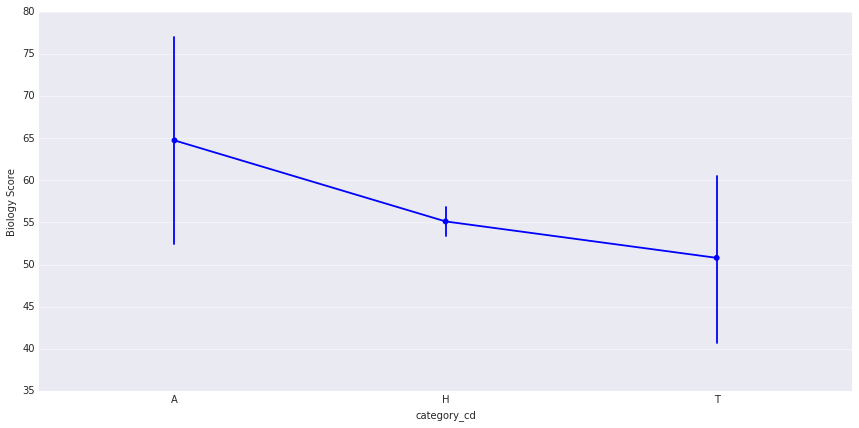

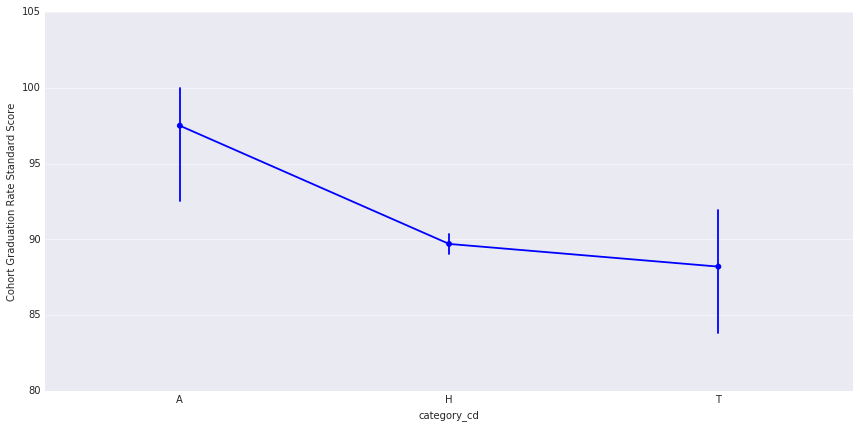

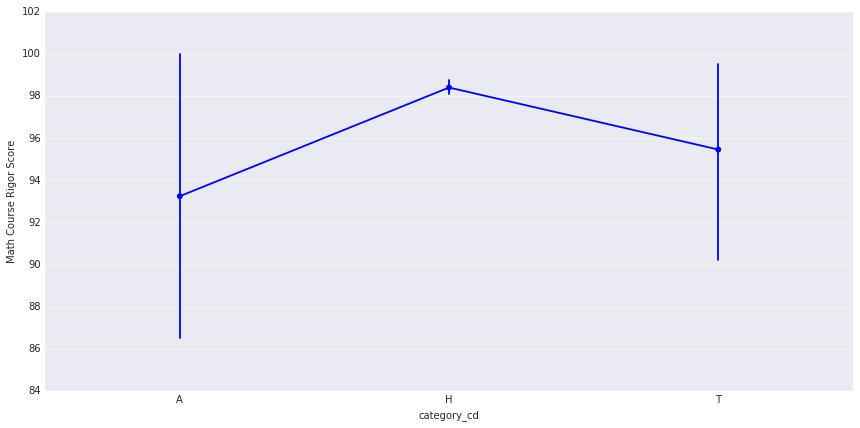

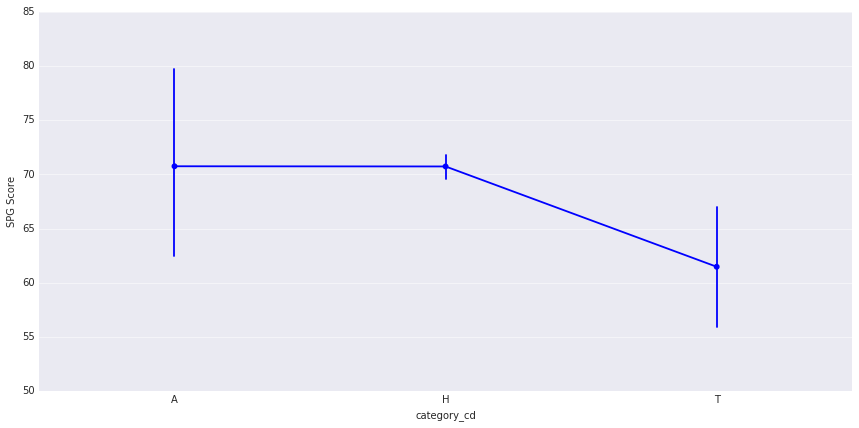

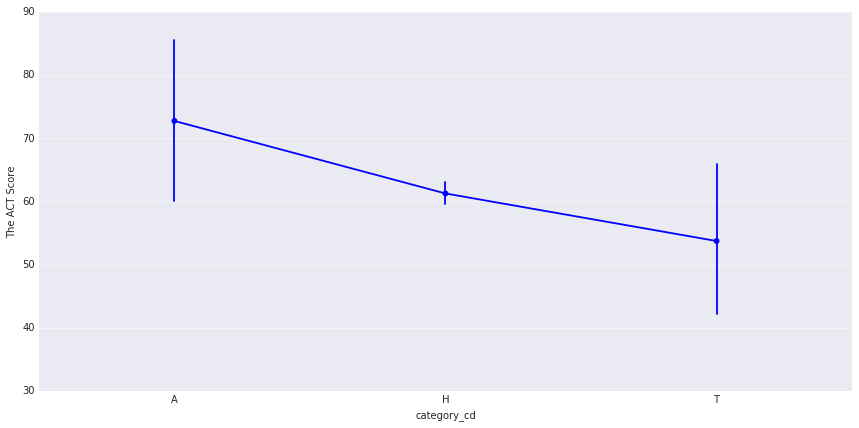

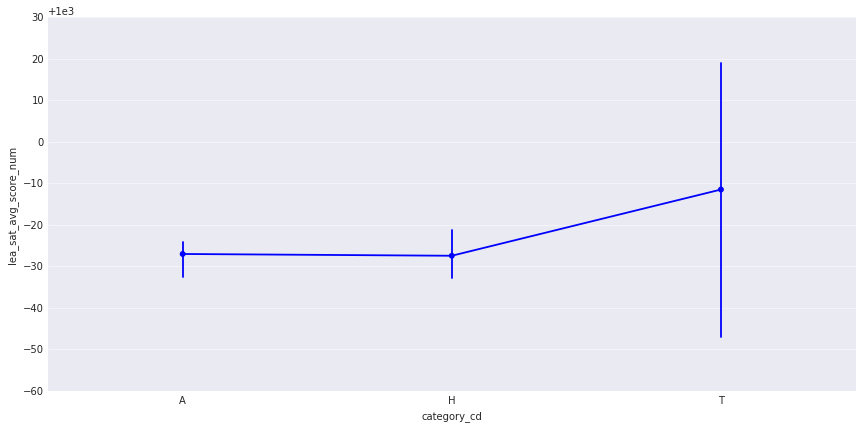

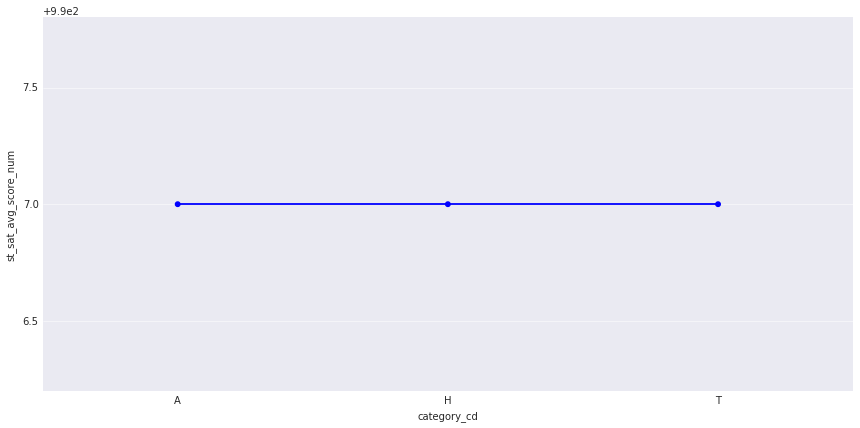

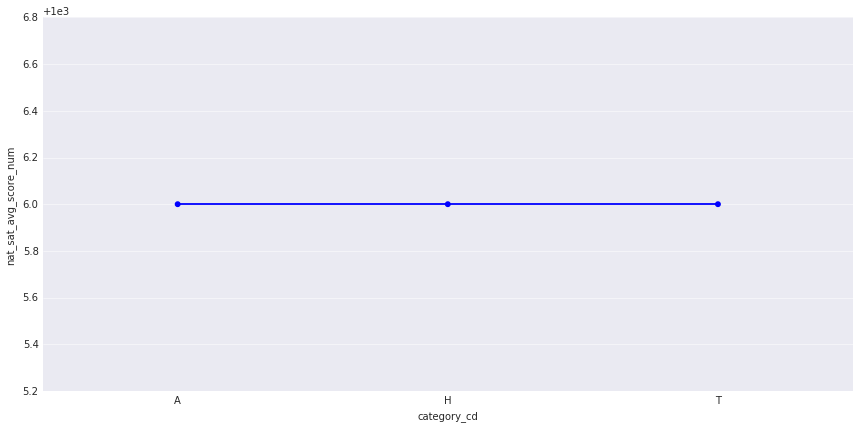

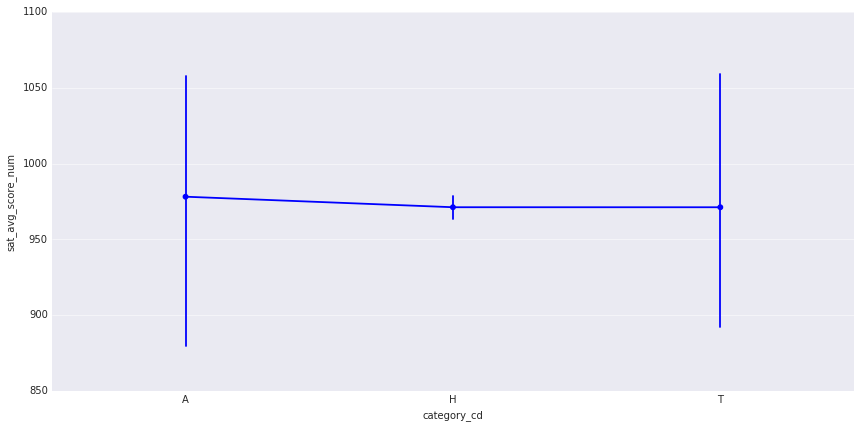

In [21]:
#Sort the x-axis (catagory_cd) from above
with sns.axes_style("darkgrid"):
    new_schooldata2=new_schooldata.sort_values(axis =0, by='category_cd')
    for i in range(0, len(Achievement_measures)):
        sns.factorplot('category_cd',Achievement_measures[i],data=new_schooldata2, size = 6, aspect=2)

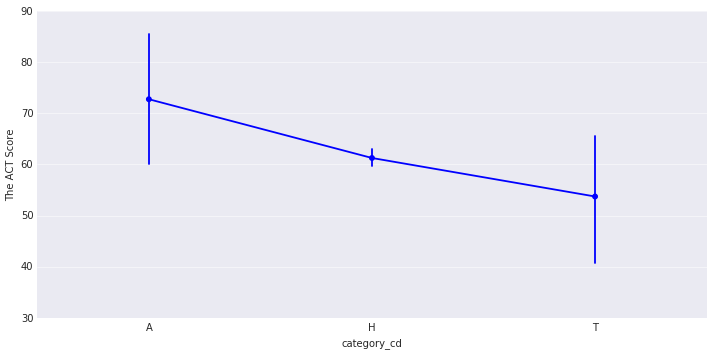

In [30]:
#sns.set_style("dark")
with sns.axes_style("darkgrid"):
    sns.factorplot('category_cd','The ACT Score',data=new_schooldata2,size=5, aspect=2)

From the above three code blocks, a strong correlation exists between School catagory_cd and its performance in the different performance and test scores measures.Considering Math Score,The ACT Score, Biology Score, EVAAS Growth Score and cohort Graduation Rate Standard score, schools category  A (Schools with elementary, middle and high school grades) performed much better followed by category H (Schools with high school grades 9-13) then Schools T (schools with middle and high school grades). We show one plot for ACT which displays the trend being described. Since the number of Schools of category A=4  and T=15 are less than the 30 samples, though a posible trend exists, we do not draw a statistical conclusion on performance based on school catagory.

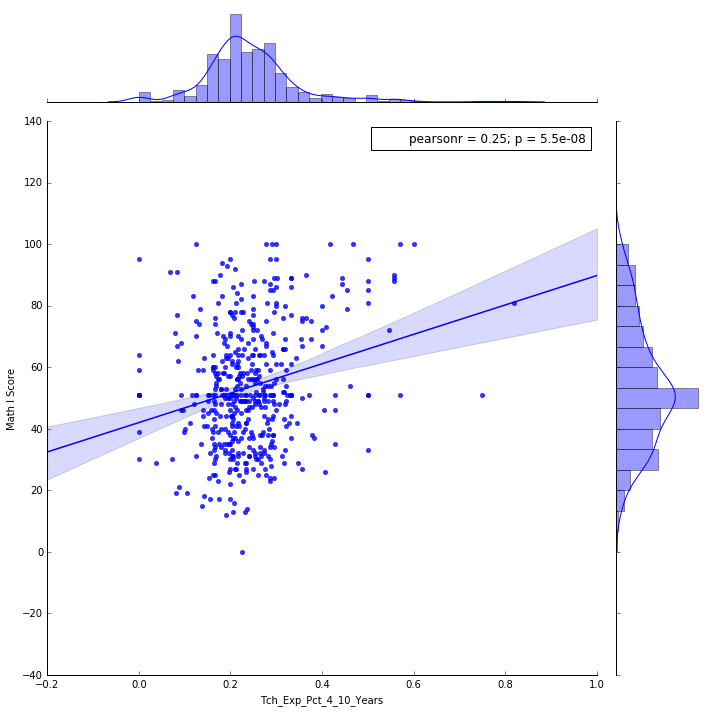

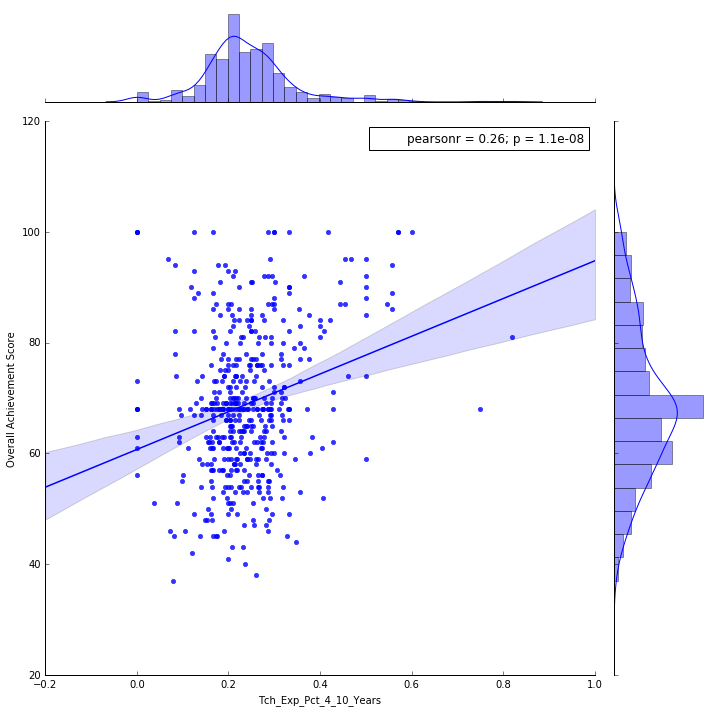

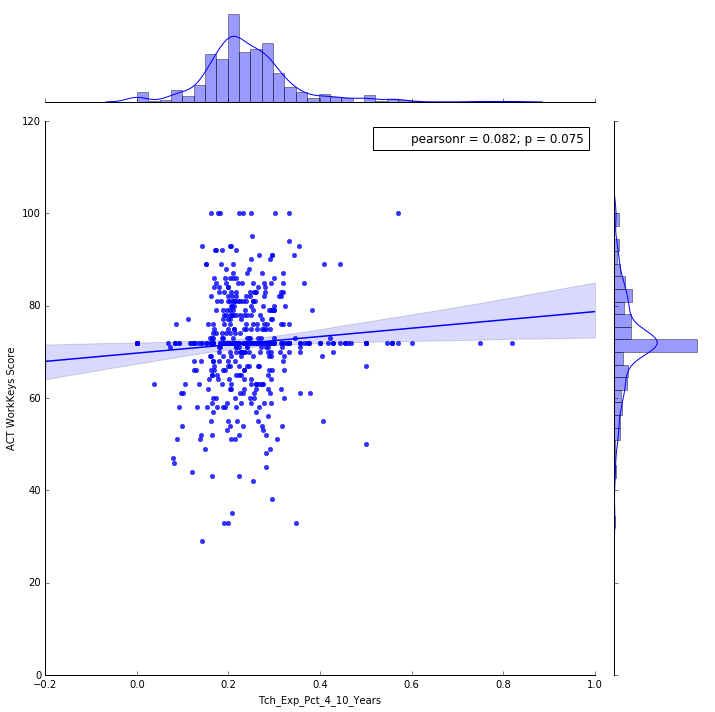

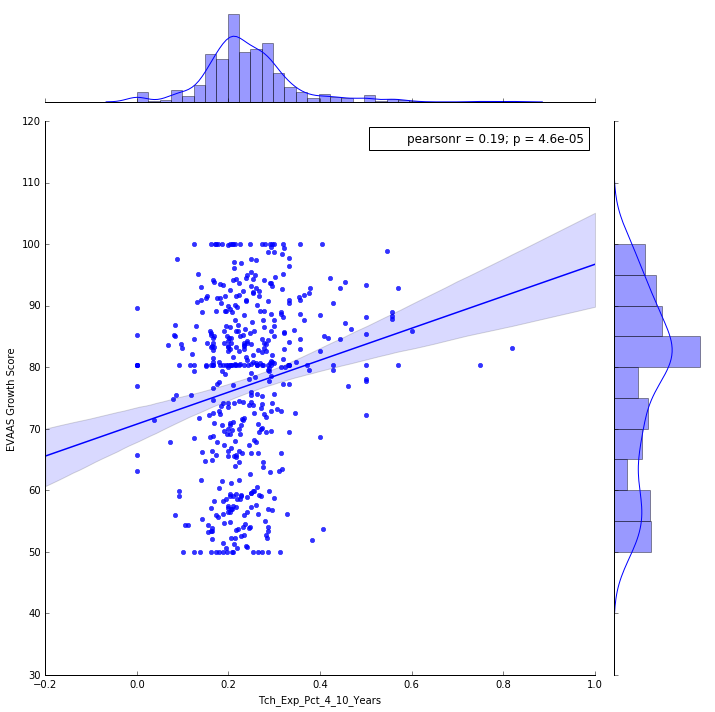

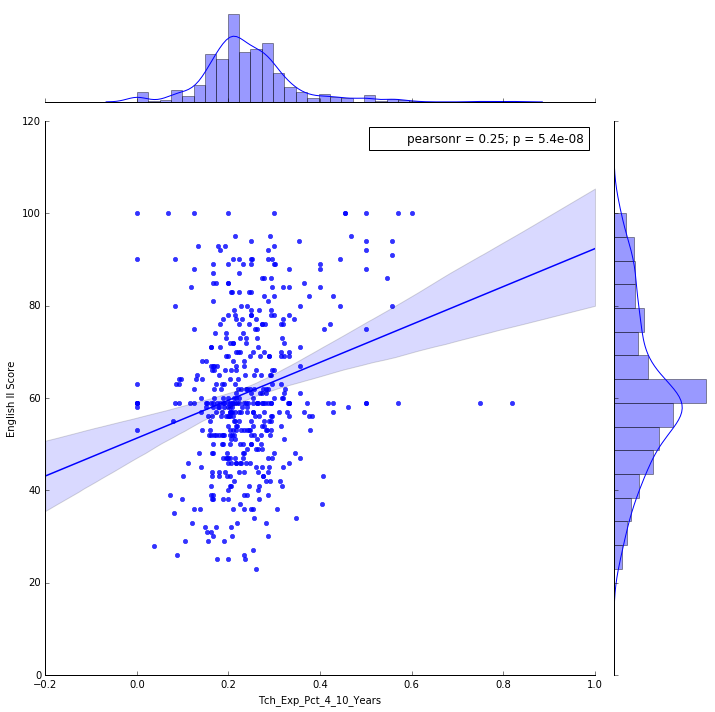

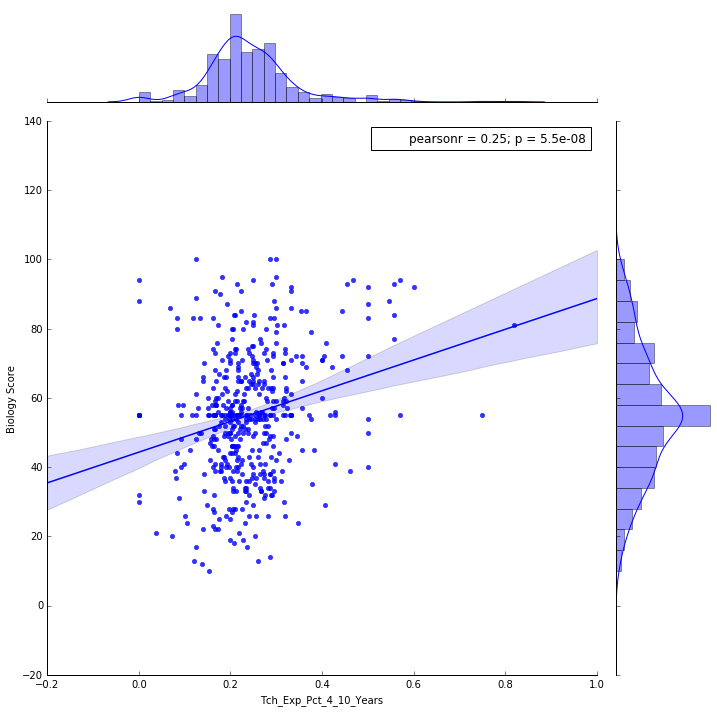

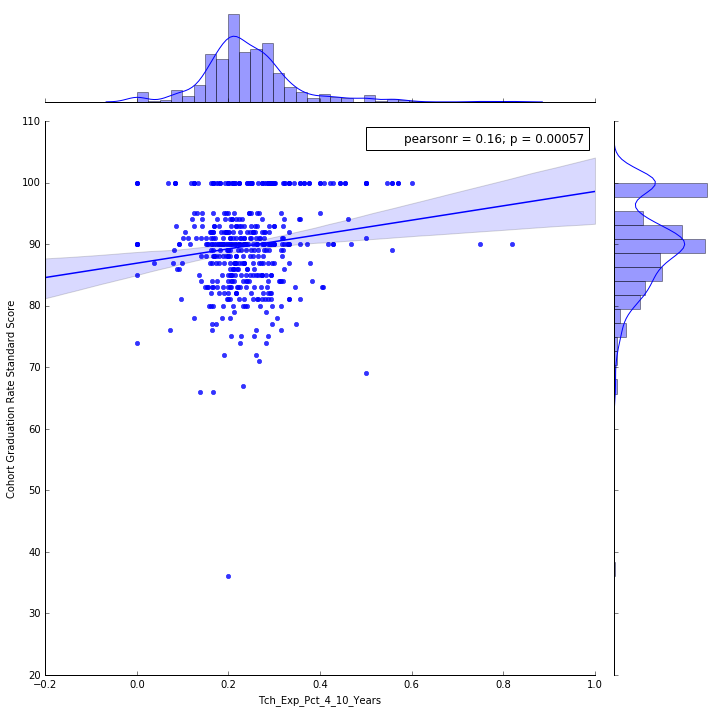

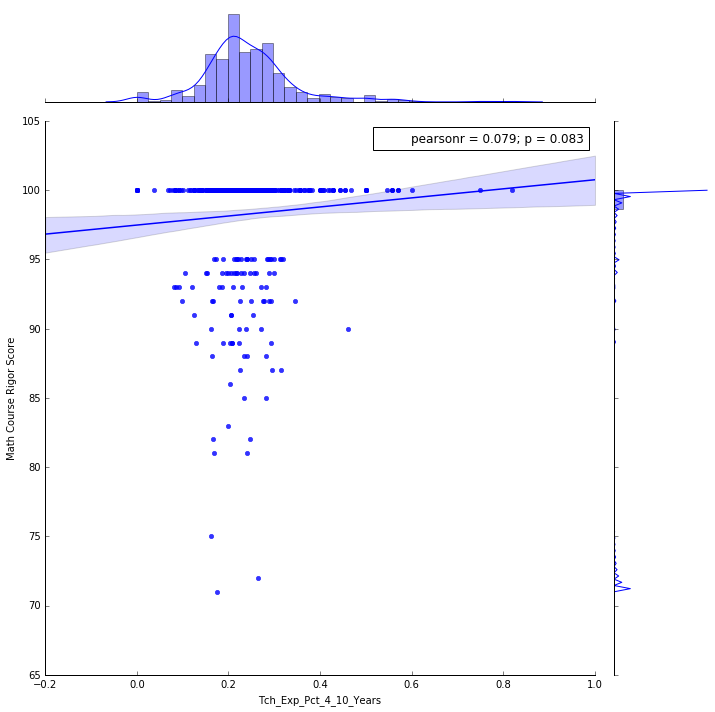

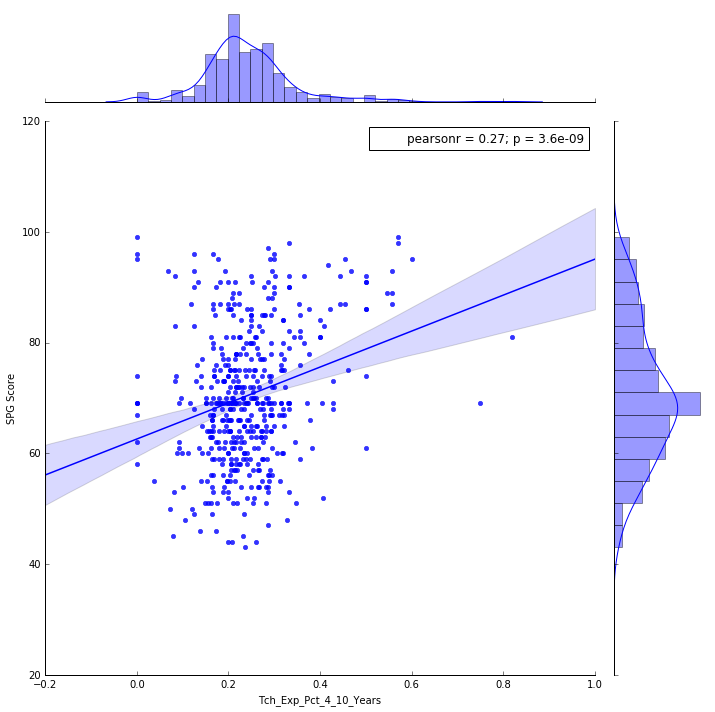

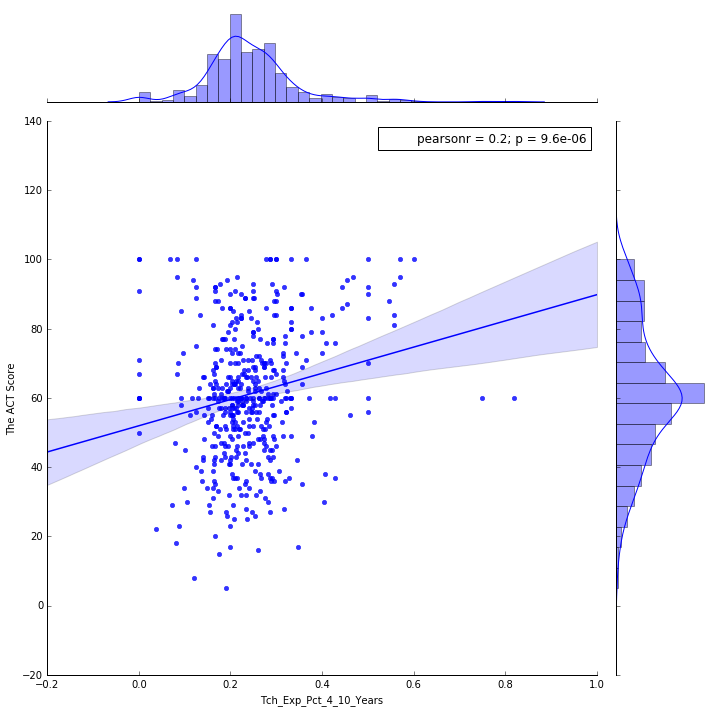

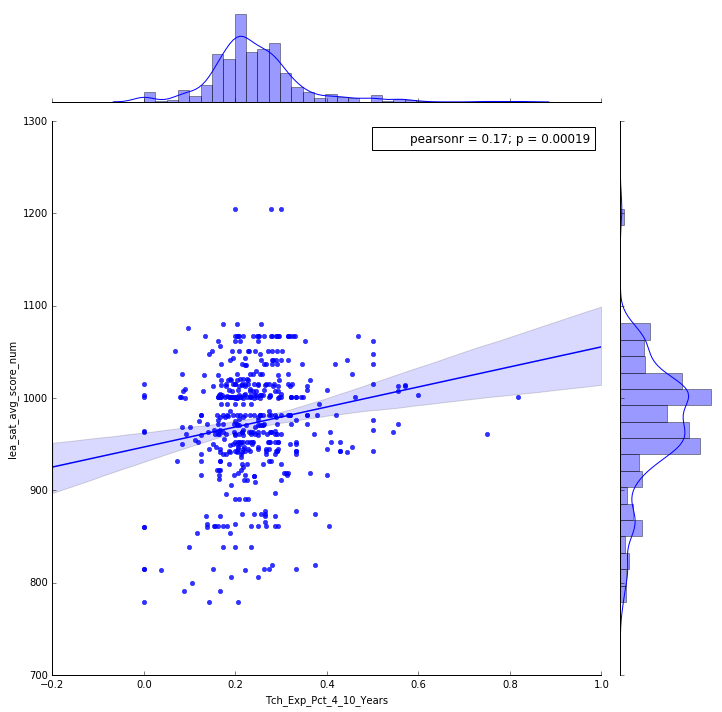

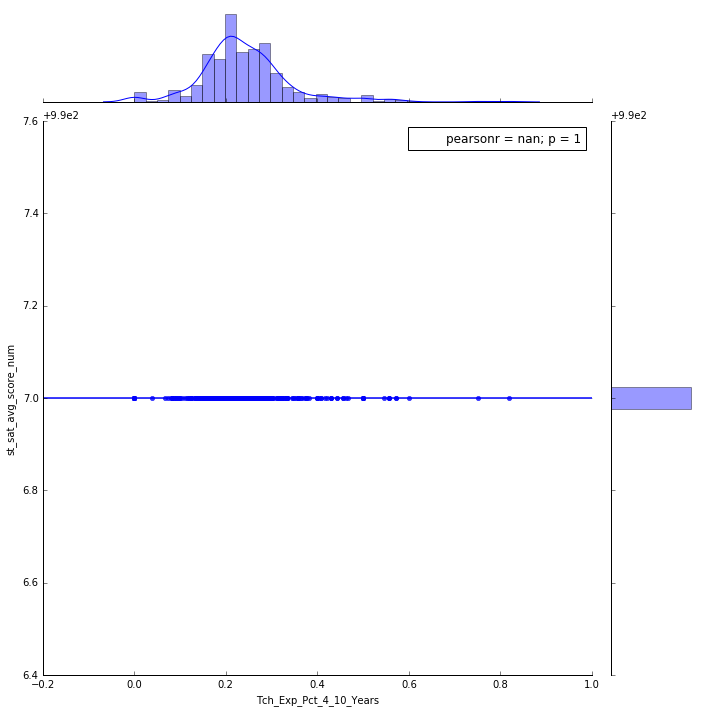

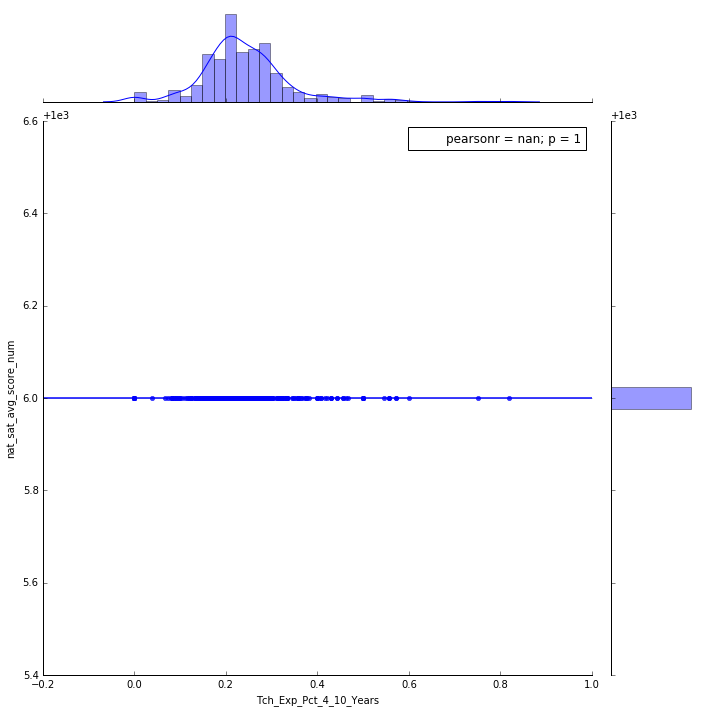

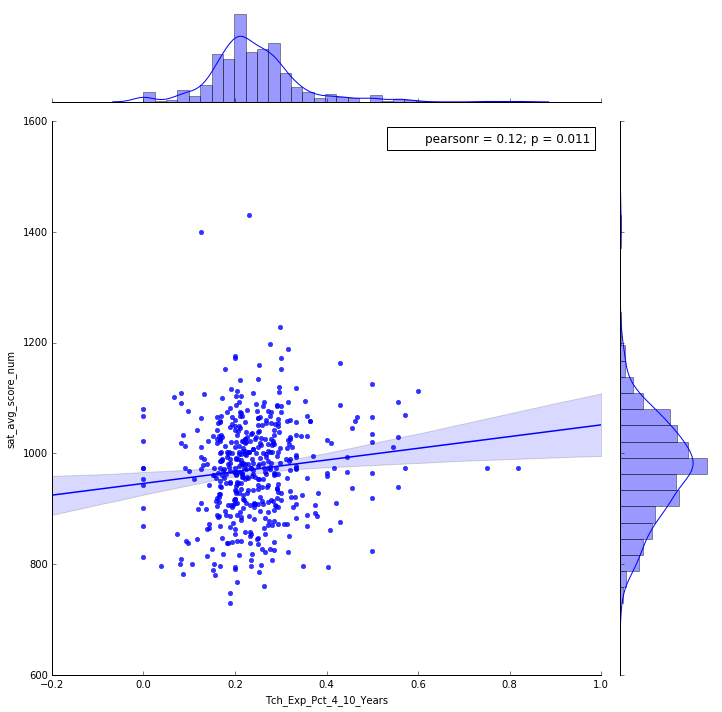

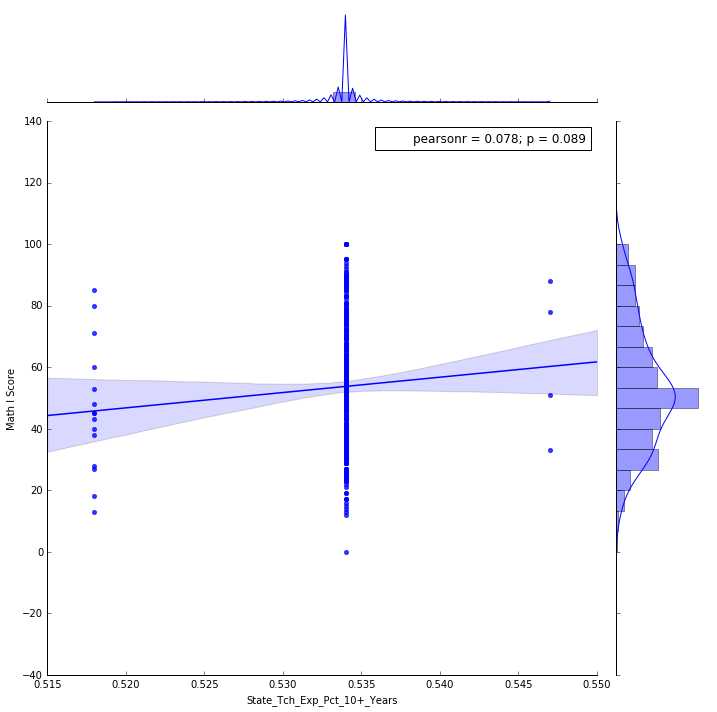

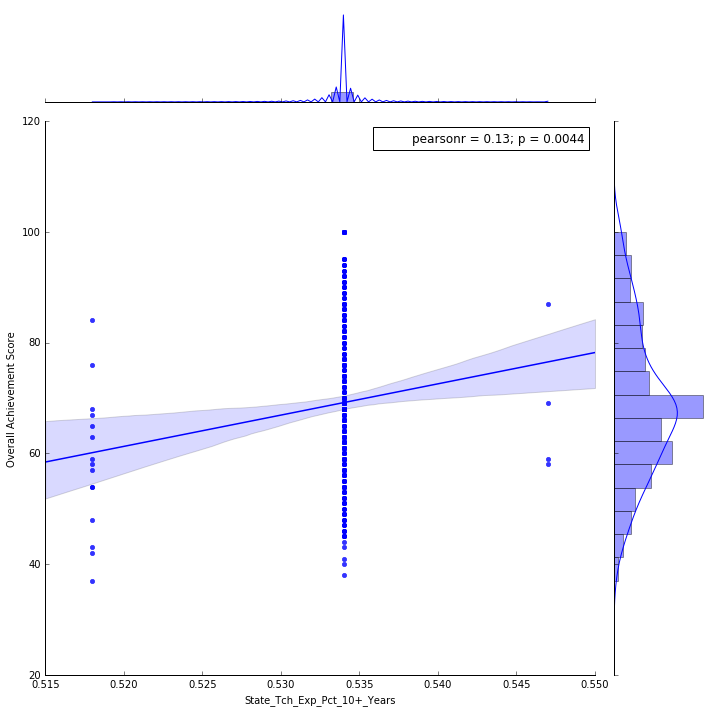

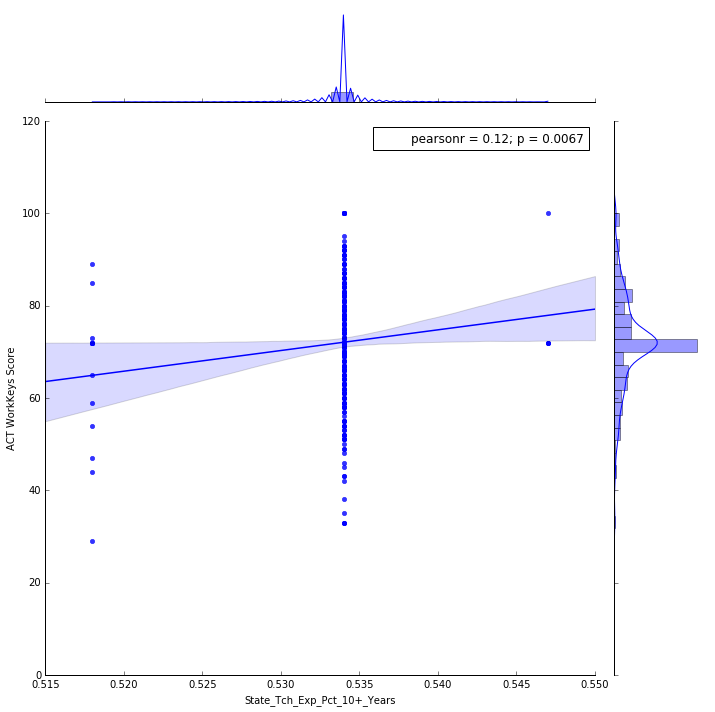

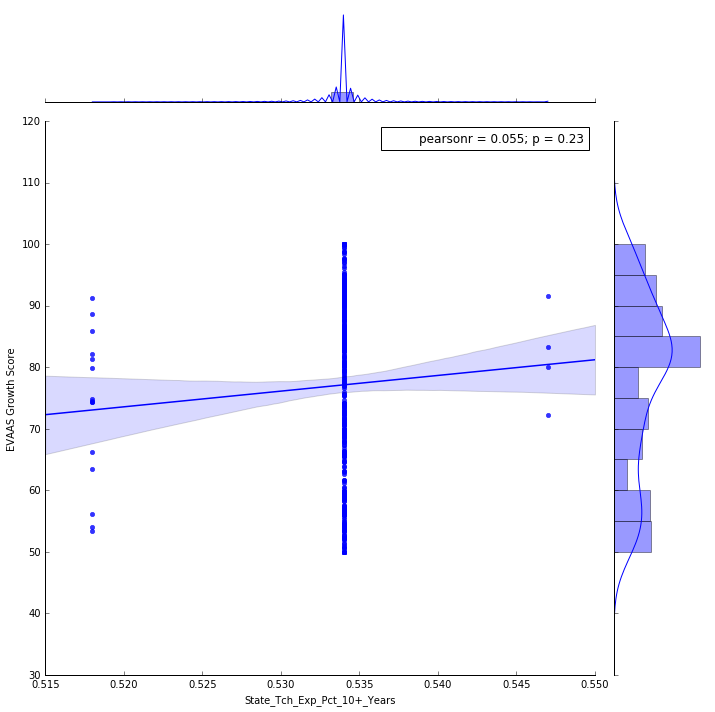

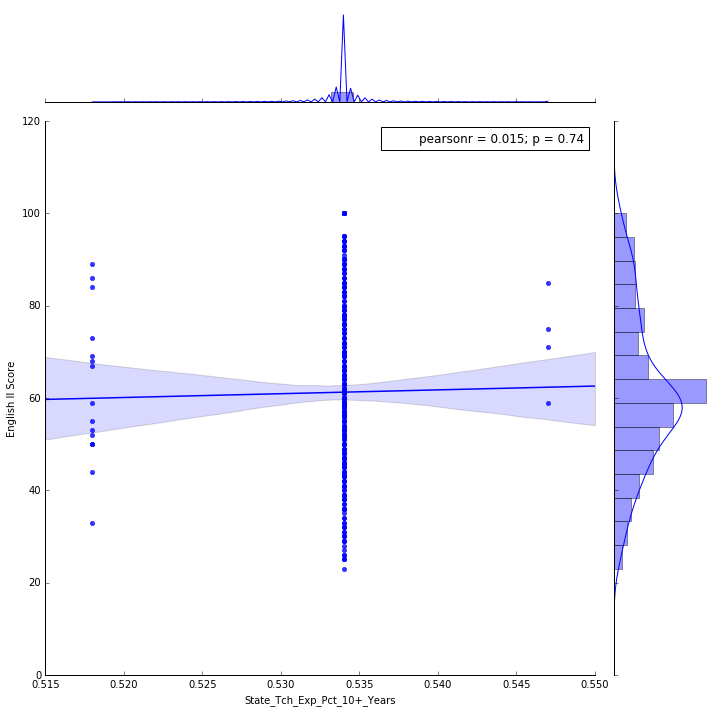

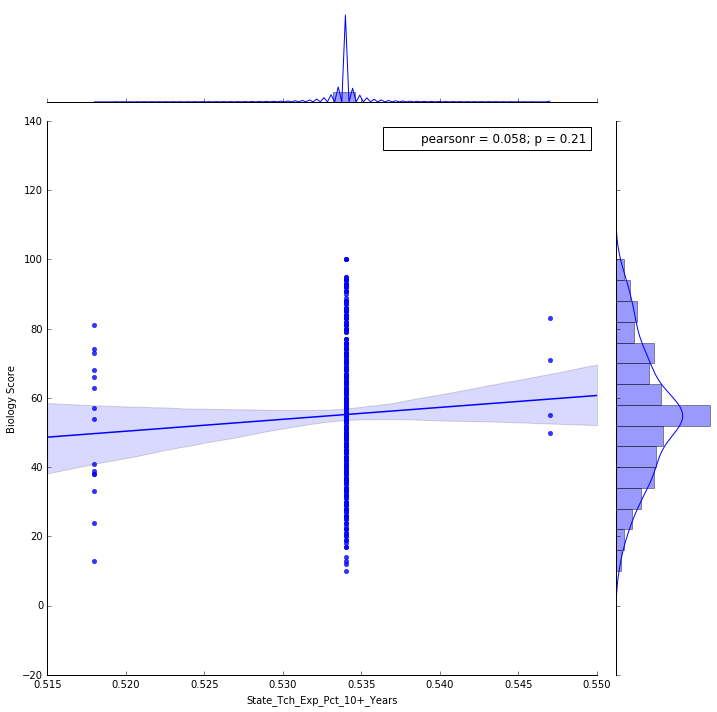

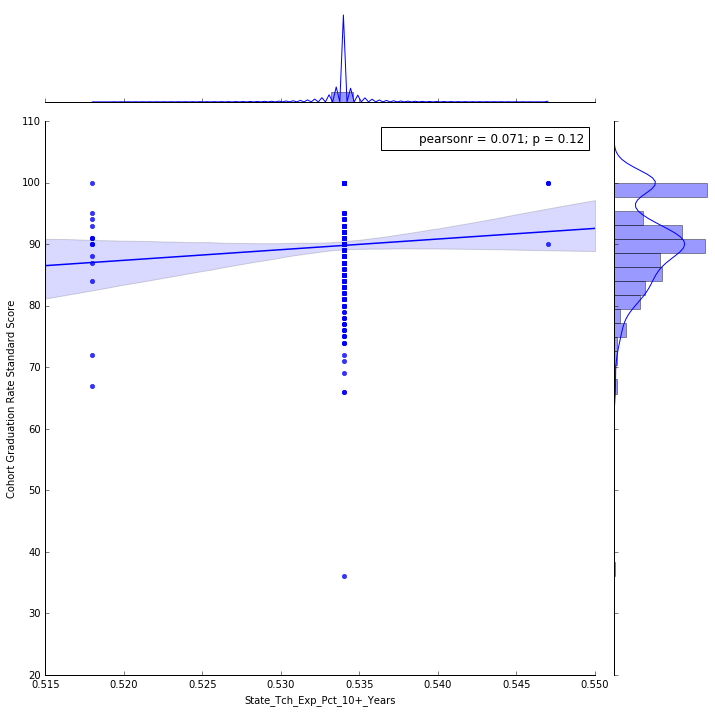

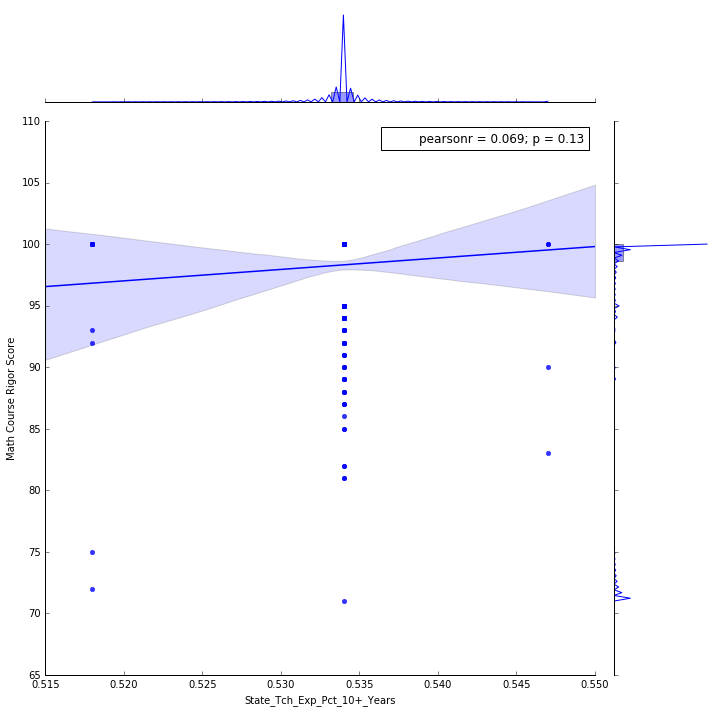

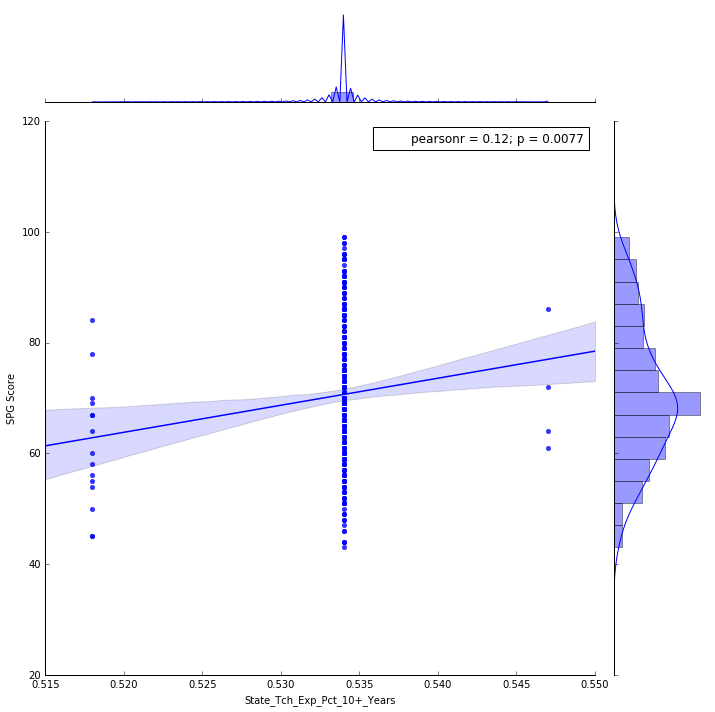

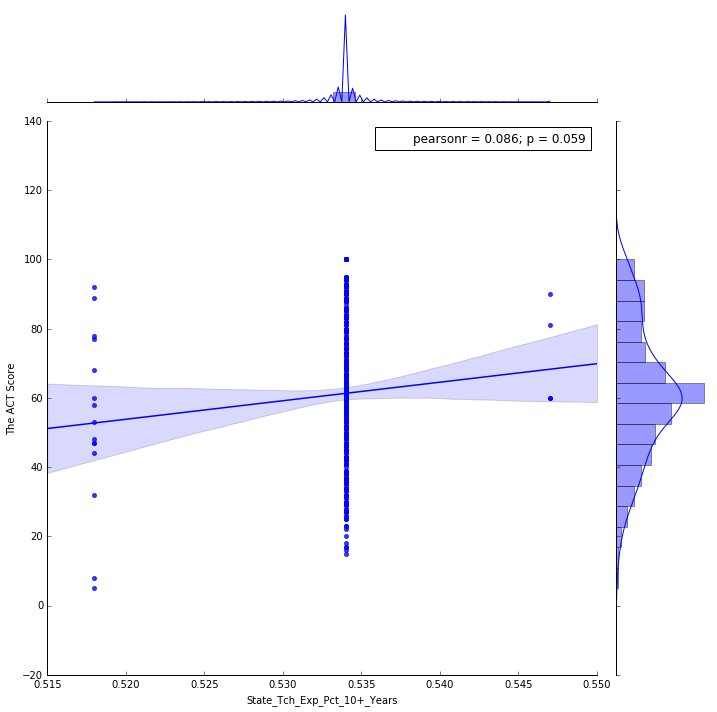

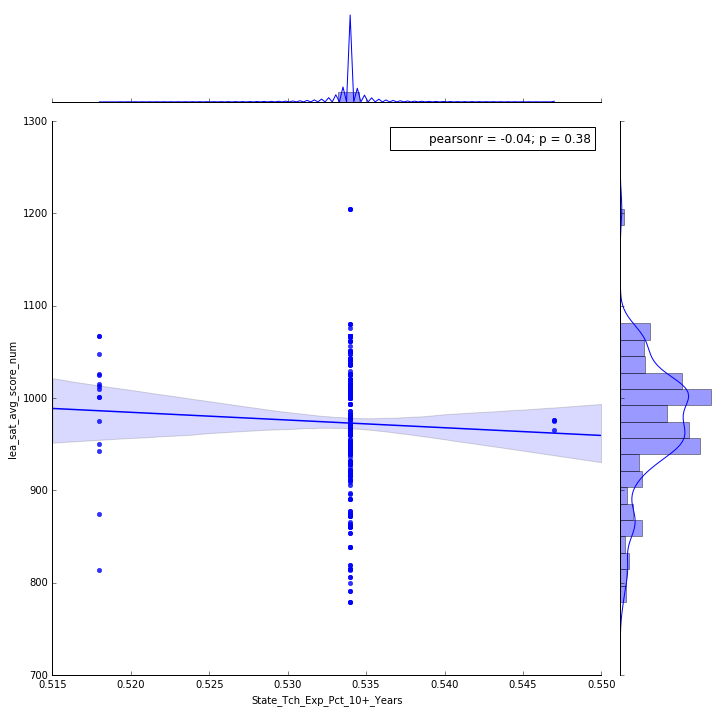

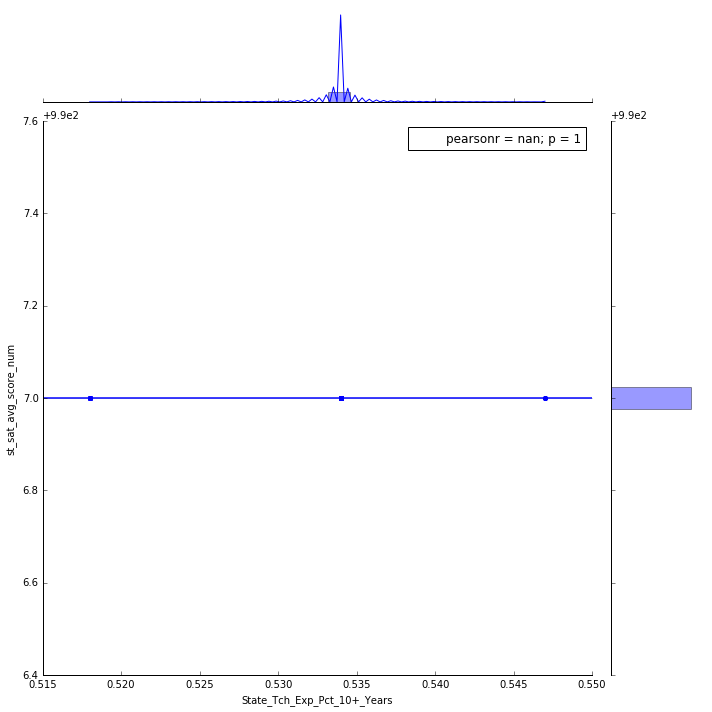

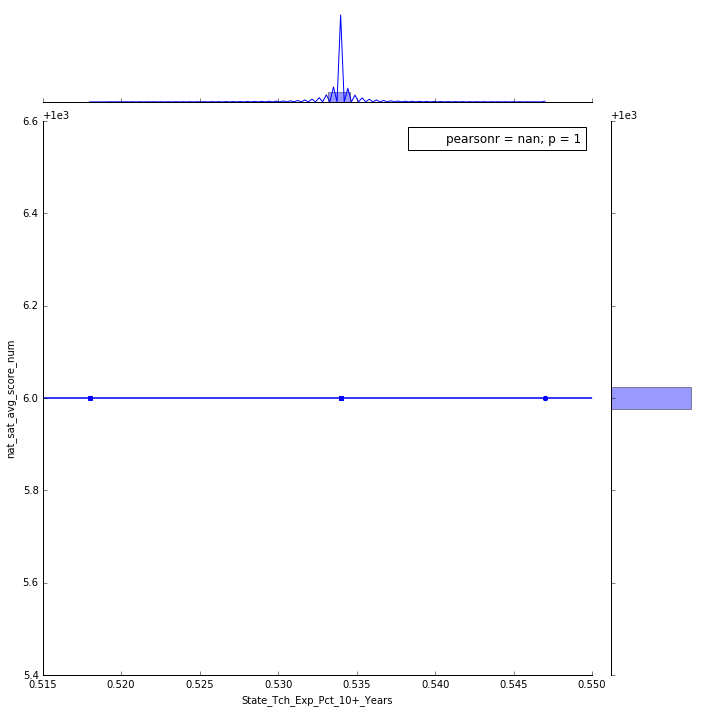

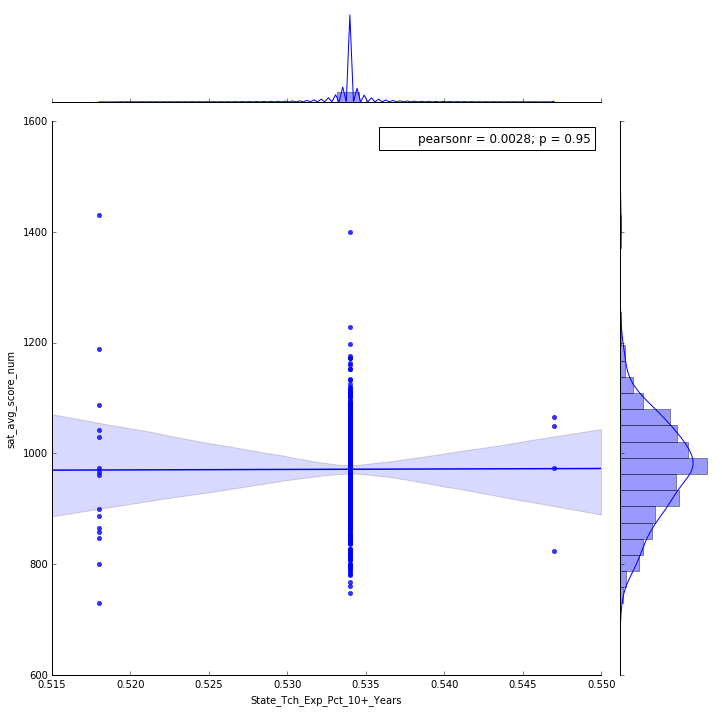

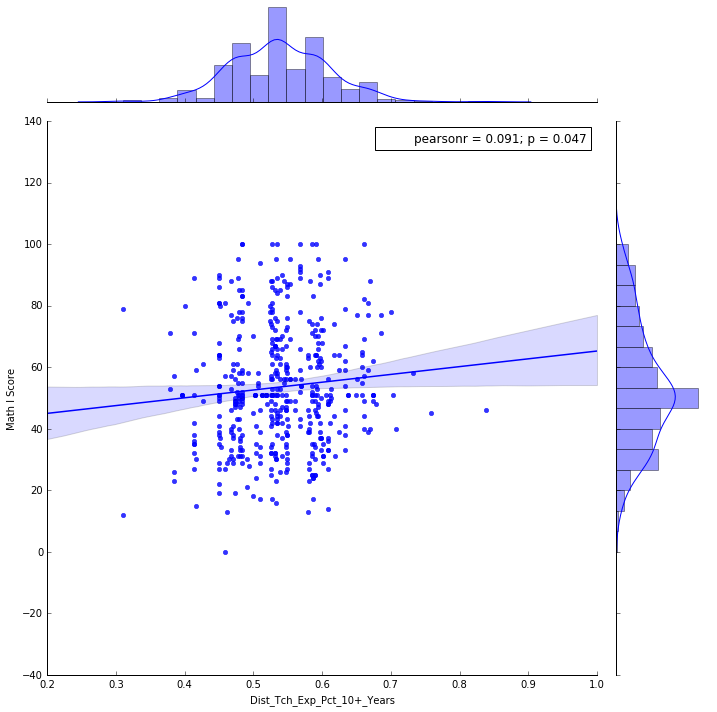

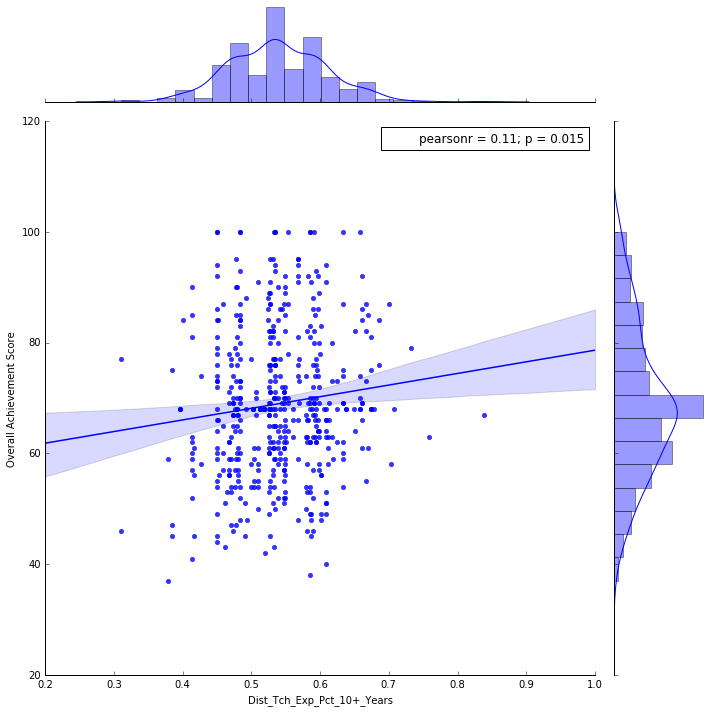

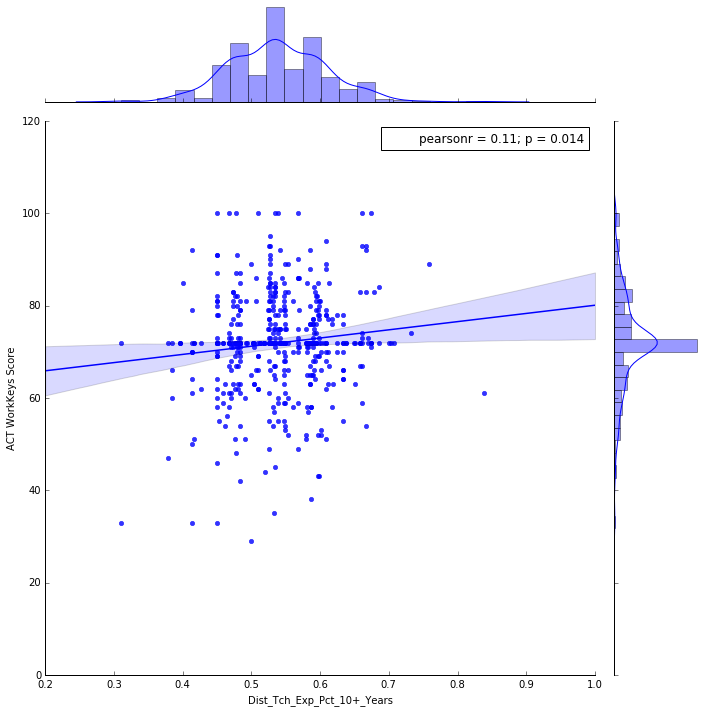

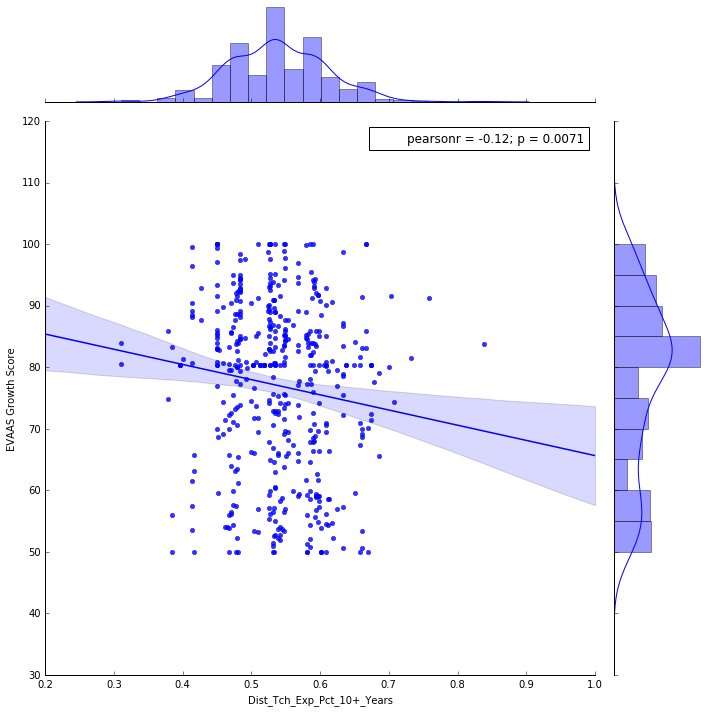

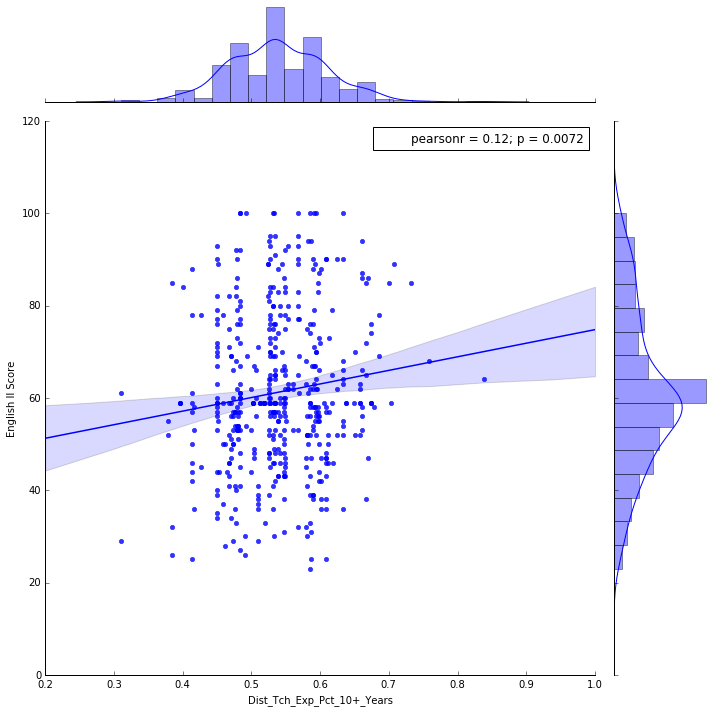

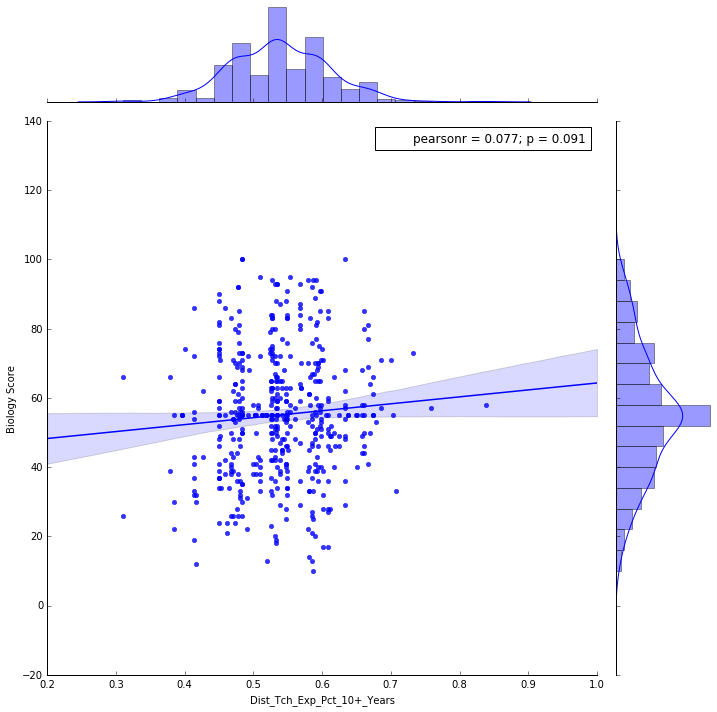

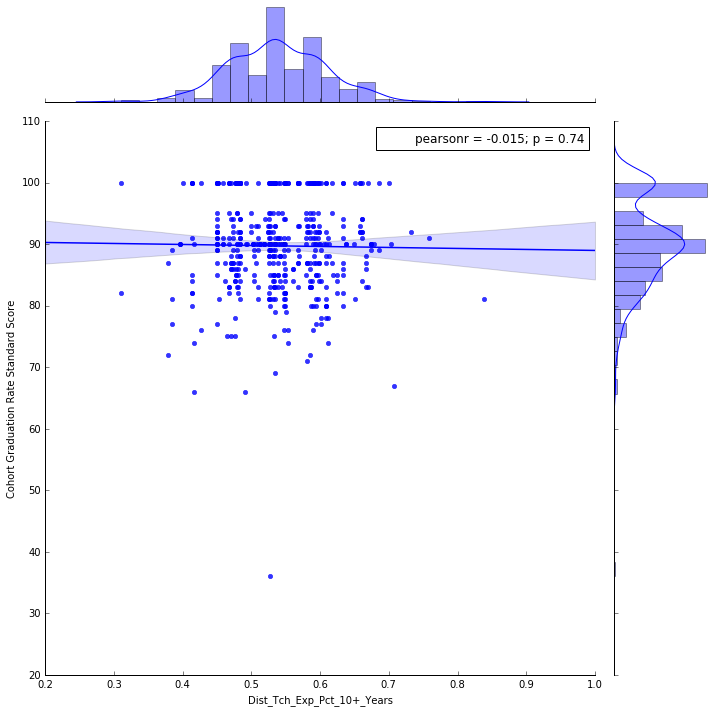

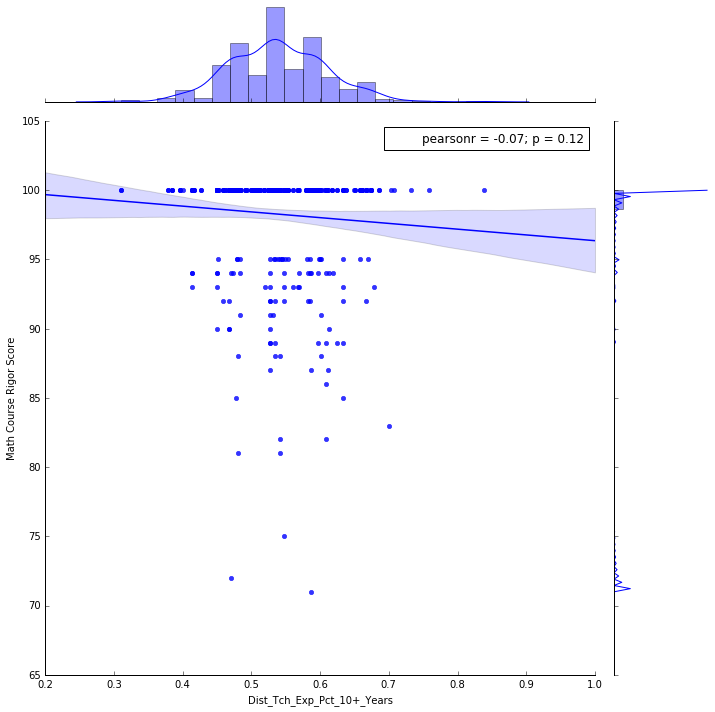

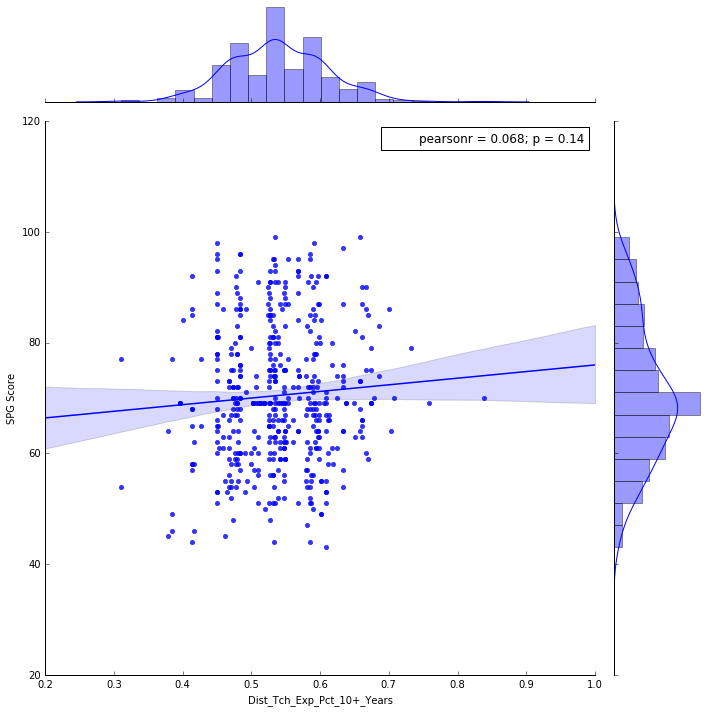

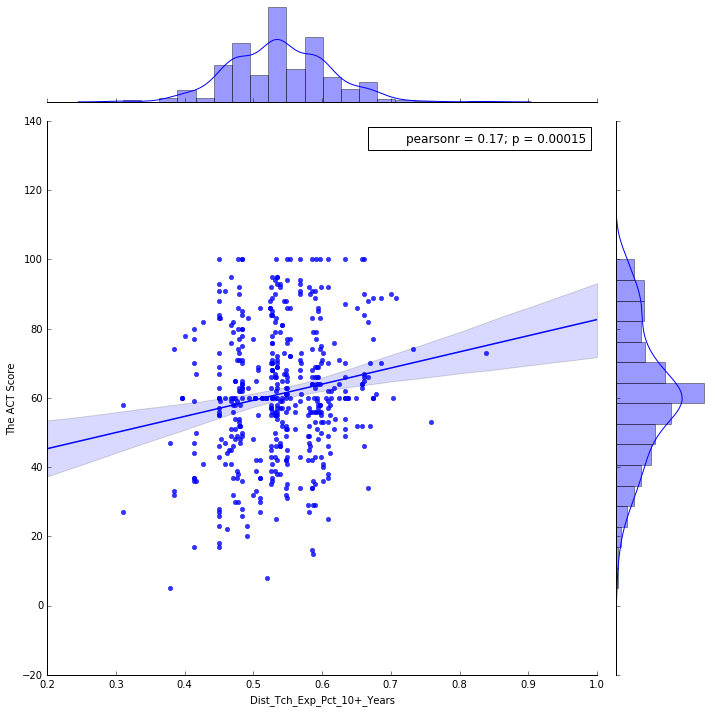

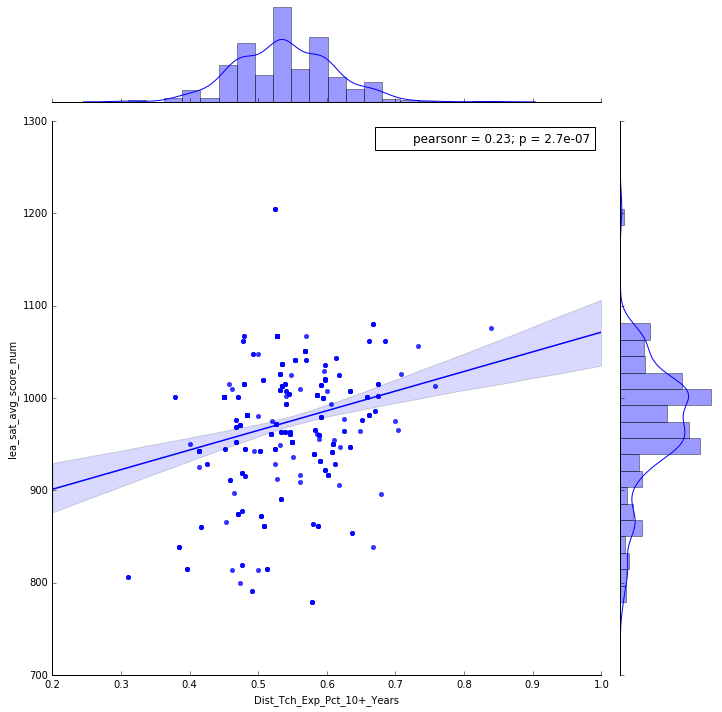

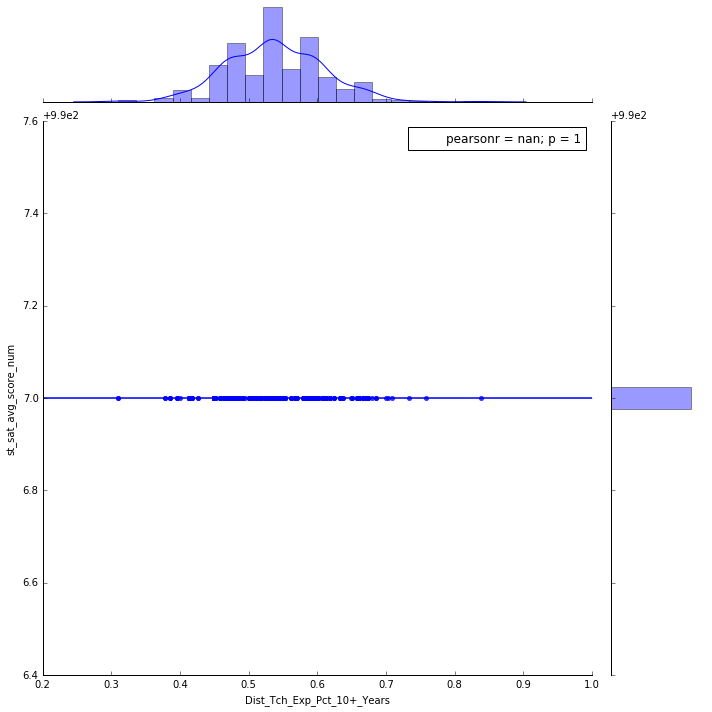

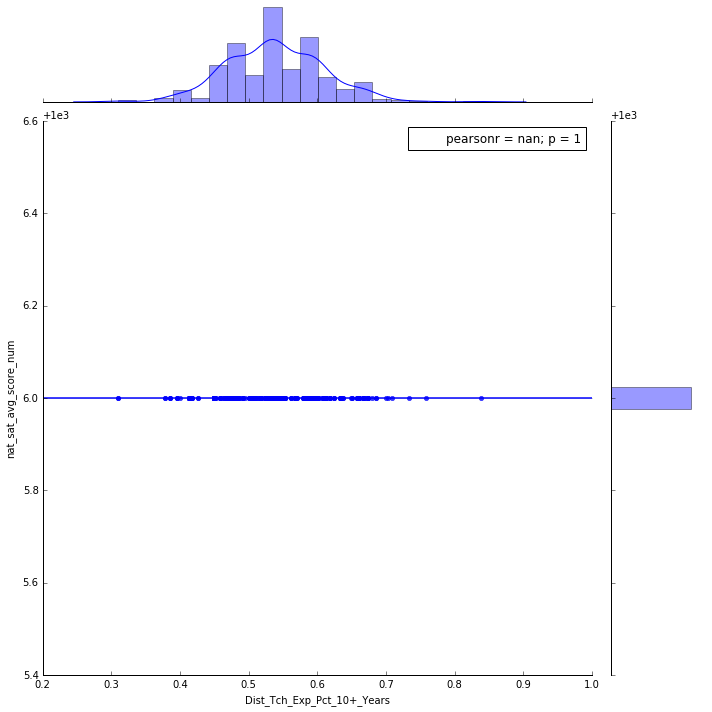

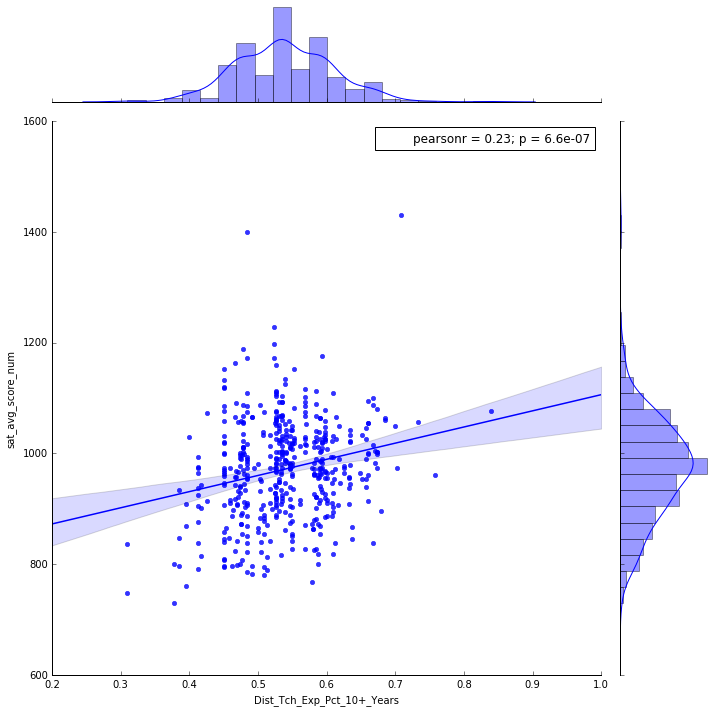

In [24]:
for i in range(0, len(Teacher)):
    for j in range(0, len(Achievement_measures)):
        sns.jointplot(new_schooldata2[Teacher[i]], new_schooldata2[Achievement_measures[j]], size=10, kind ='reg')

    #sns.factorplot('category_cd',Teacher[i],data=new_schooldata2)

In [32]:
#finding a list of the most correlate features
c = new_schooldata.corr().abs()
s =pd.DataFrame(c.unstack())
#so = s.order(kind="quicksort")
s['Correlation Pair'] = s.index
s = s.reset_index()
#del s['index']
s.columns = ['Column1', 'Column2', 'correlation','Correlation Pair']
result = s.sort_values('correlation', ascending=0)
result2 = result[ result.correlation<1]
result3 = result2[result2.correlation>0.6]
result4 = result3.iloc[::2] # drop alt rows which are duplicate Corr
result4[result4.Column1.isin(Achievement_measures)]
#result3.head()

,Column1,Column2,correlation,Correlation Pair
17134,SPG Score,Overall Achievement Score,0.979572,"(SPG Score, Overall Achievement Score)"
17870,The ACT Score,Overall Achievement Score,0.906883,"(The ACT Score, Overall Achievement Score)"
17904,The ACT Score,English II Score,0.879376,"(The ACT Score, English II Score)"
4057,Overall Achievement Score,Math I Score,0.876368,"(Overall Achievement Score, Math I Score)"
10326,English II Score,Overall Achievement Score,0.875000,"(English II Score, Overall Achievement Score)"
17121,SPG Score,Math I Score,0.869972,"(SPG Score, Math I Score)"
17941,The ACT Score,SPG Score,0.869854,"(The ACT Score, SPG Score)"
17173,SPG Score,Biology Score,0.865069,"(SPG Score, Biology Score)"
10397,English II Score,SPG Score,0.861556,"(English II Score, SPG Score)"
11246,Biology Score,Overall Achievement Score,0.854044,"(Biology Score, Overall Achievement Score)"


Through correlation calculation, as could have been expected, there exists a strong correlation between standardized tests.. Though one could have expected perfomance in tests to be strongly correlated to attendance, Average daily attendance 'avg_daily_attend_pct' shows up with a moderate correlation of 0.62 to The ACT Score and 0.61 to English II Score  

#### Explore Attributes and Class [10]
Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).

#### New Features [5]
Are there other features that could be added to the data or created from existing features? Which ones?

In [26]:
# create Factors for 'Overall Achievement Score'
# A: >85
# B: 70-85
# C: 50-70
# D: <50

new_schooldata['Overall Achievement Score'].describe()

count    478.000000
mean     68.937238 
std      13.255442 
min      37.000000 
25%      60.000000 
50%      68.000000 
75%      77.000000 
max      100.000000
Name: Overall Achievement Score, dtype: float64

#### Exceptional Work [10]
You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results.

#### 1. Data Dictionary
Since this datasets has numerous columns we needed a fast way to quickly find ColumnName description for easy reference. For exceptional work, we created a function to quickly pull the data from csv datafile. This involved converting the pdf to excel and formating the data for easy import into pandas. The code below is a working code for our data dictionary.

In [3]:
# This is a simple function to pull column description
DataDict = pd.read_csv(wd+'\\data\\dictionary.csv', encoding = "ISO-8859-1")
DataDict.head()
#DataDict = DataDict.columns['COLUMN_NAME', 'DESCRIPTION']
def get_ColDescription(colname = 'Year'):
    colName = input("Enter column name to check description in Dictionary. You can enter multiple columns separated by comma: ")
    
    print('You entered: ', colName.strip())
    temp = pd.DataFrame()
    colNames = colName.split(',')
    
    try:
        for i in range(0,len(colNames)):
            get = (DataDict[DataDict.COLUMN_NAME==colNames[i].strip().lower()])
            temp = temp.append(get)
        return(temp)
    except Exception as e:
        print(e.args) 

get_ColDescription()

Enter column name to check description in Dictionary. You can enter multiple columns separated by comma: 
You entered:  


,COLUMN_NAME,DESCRIPTION


In [ ]:
# embedding Image

from IPython.display import Image
Image(url='https://public.tableau.com/en-us/s/gallery/life-hashtag')